In [ ]:
!python -m spacy download el_core_news_md

     |████████████████████████████████| 132.6MB 1.1MB/s 
  Created wheel for el-core-news-md: filename=el_core_news_md-2.2.5-cp36-none-any.whl size=137053459 sha256=20334d434d753378fd4fd3b3dd7c8476c4b9c1e9e81e28a62bb5f668fd01f7c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-hwyls_gv/wheels/e3/70/65/a02c5c86342d8a6d6d25664309af6137a0c514206e96438251
Successfully built el-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import pandas as pd
import numpy as np
import requests
import os
import nltk.sentiment

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
!pip install NRCLex
from nrclex import NRCLex

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/newsbeastendenaenacom.csv")
df_news

,Unnamed: 0,Unnamed: 0.1,title,date,body,url,comments,Date
0,0,1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10
1,1,1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10
2,2,1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10
3,3,1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10
4,4,1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10
...,...,...,...,...,...,...,...,...
17431,17431,3553,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Γιατί δεν λέτε πόσα από την Αττική δεν είναι τ...,2020-09-15
17432,17432,3553,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15
17433,17433,3553,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,να μας πει την γνώμη της για τα 197 κρούσματα ...,2020-09-15
17434,17434,3553,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Θα ηθελα και γω πολυ ν ακουσω τη γνωμη της γι ...,2020-09-15


In [ ]:
df_news = df_news.drop(columns=['Unnamed: 0'])


In [ ]:
df_news = df_news.drop(columns=['Unnamed: 0.1'])

In [ ]:
df_news.sort_values(by='Date', ascending=False)

,title,date,body,url,comments,Date
1371,Το στοίχημα του μαζικού εμβολιασμού και η ανάσ...,12/12/2020,Η διαχείριση του δεύτερου κύματος της πανδημία...,https://www.newsbeast.gr/politiki/arthro/69093...,Τι δεν καταλαβαίνειςΑλλά τι ρωτάω,2020-12-12
147,Τσακαλώτος: Όσο και να το βασανίζει ο κ. Σταϊκ...,12/12/2020,Την άποψη ότι «όσο και να βασανίσει τα στοιχεί...,https://www.newsbeast.gr/politiki/arthro/69093...,λεφτοδεντρα??????τσακαλε με το κοκκινο σακιδι....,2020-12-12
149,Τσακαλώτος: Όσο και να το βασανίζει ο κ. Σταϊκ...,12/12/2020,Την άποψη ότι «όσο και να βασανίσει τα στοιχεί...,https://www.newsbeast.gr/politiki/arthro/69093...,"Επειδή θέμα σου είναι τα οικονομικά , μάλλον θ...",2020-12-12
150,Τσακαλώτος: Όσο και να το βασανίζει ο κ. Σταϊκ...,12/12/2020,Την άποψη ότι «όσο και να βασανίσει τα στοιχεί...,https://www.newsbeast.gr/politiki/arthro/69093...,Για το Σουνιο ήξερες ;;;Και τον άφησες να εκτε...,2020-12-12
151,Τσακαλώτος: Όσο και να το βασανίζει ο κ. Σταϊκ...,12/12/2020,Την άποψη ότι «όσο και να βασανίσει τα στοιχεί...,https://www.newsbeast.gr/politiki/arthro/69093...,Εσύ για τον Βολταίρο ξέρεις;Για τον Κήρυκα Δαν...,2020-12-12
...,...,...,...,...,...,...
3809,Εκατοντάδες χιλιάδες παγκολίνοι έχουν πουληθεί...,20/02/2020,"Σχεδόν 900.000 παγκολίνοι, ένα ζώο που απειλεί...",https://www.newsbeast.gr/environment/arthro/60...,Εναν τον εχουμεε μη τον χασουμετον παγκαλινο -...,2020-02-20
3808,Εκατοντάδες χιλιάδες παγκολίνοι έχουν πουληθεί...,20/02/2020,"Σχεδόν 900.000 παγκολίνοι, ένα ζώο που απειλεί...",https://www.newsbeast.gr/environment/arthro/60...,Ασιάτες...πολύ καλοφαγάδες αυτό οι κιτρινιαριδ...,2020-02-20
14498,Κορονοϊός: Το ΔΝΤ φοβάται εκτροχιασμό της παγκ...,19/02/2020,H επιδημία του νέου κορονοϊού έχει ήδη αποδιαρ...,https://www.newsbeast.gr/financial/arthro/6034...,Απο δω θα το φέρουν απο και θα το πάνε πάλι φό...,2020-02-19
17435,Κορονοϊός: Απομονωμένοι στο νοσοκομείο όσοι επ...,19/02/2020,Στην ειδική πτέρυγα του νοσοκομείου 'Αροου Παρ...,https://www.newsbeast.gr/health/coronavirus/ar...,γενοβεζικο που μετεφερε την ασθενεια απο τη μα...,2020-02-19


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#COMMENTS

In [ ]:
df_news['Sxolia'] = df_news['comments'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
import spacy
nlp = spacy.load('el_core_news_md')

In [ ]:
sw = nlp.Defaults.stop_words

In [ ]:
#καθαρισμός σημείων στίξης κλπ.
def clean_text(text):
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove stop words
    text = [x for x in text if x not in sw]
    # lower text
    #text = [remove_ton(x) for x in text]
    #remove quotes
    text = [x.replace('quot;','').replace('&quot','') for x in text if x not in ['quot','amp']]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove amp & quot
    text = [x for x in text if x not in ['quot','amp']]
    # remove words with only one letter
    text = " ".join([t for t in text if len(t) > 1])
    # lemmatize text
    #text = " ".join([(t.lemma_) for t in nlp(text)])
    return(text)

In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia'].fillna("").apply(lambda x : clean_text(x) )


In [ ]:
def removing_accents(word):
    """
    Removes accents from a given word.
    
    Parameters
    ----------
    word : str
        the word from which we want to remove the accents

    Returns
    -------
    str
        the word without accents
    """
    return (word.replace('ά', 'α').replace('έ', 'ε').replace('ή', 'η').replace('ί', 'ι').replace('ό', 'ο').replace('ύ', 'υ')
            .replace('ώ', 'ω').replace('ϊ', 'ι').replace('ϋ', 'υ').replace('ΐ', 'ι').replace('ΰ', 'υ').replace('Ά', 'Α')
            .replace('Έ', 'Ε').replace('Ή', 'Η').replace('Ί', 'Ι').replace('Ό', 'Ο').replace('Ύ', 'Υ').replace('Ϊ', 'Ι')
            .replace('Ϋ', 'Υ').upper())

In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia'].fillna("").apply(lambda x : removing_accents(x) )
df_news['Sxolia_clean'] 

0        ΤΟ ΗΞΕΡΑΝ !!! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝΑΝ ΤΕΣΤ ΣΤΑ ΣΧΟ...
1        ΣΤΗΝ ΕΛΛΑΔΑ Ο ΙΟΣ ΔΕΝ ΜΕΤΑΔΙΔΕΤΑΙ ΣΤΑ ΣΧΟΛΕΙΑ....
2        ΔΕΝ ΕΧΕΙ ΑΠΗΧΗΣΗ ΤΟ ΕΜΒΟΛΙΟ ΣΤΙΣ ΜΙΚΡΕΣ ΗΛΙΚΙΕ...
3        ΚΑΙ Η ΜΙΚΡΗ ΠΕΡΙΜΕΝΕΙ ΜΕ ΑΝΥΠΟΜΟΝΗΣΙΑ ΝΑ ΑΝΟΙΞ...
4        ΓΙΑΤΙ ΑΛΛΑΞΑΝ ΚΑΙ ΕΚΛΕΙΣΑΝ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ ΔΟΥΜΕ...
                               ...                        
17431    ΓΙΑΤΙ ΔΕΝ ΛΕΤΕ ΠΟΣΑ ΑΠΟ ΤΗΝ ΑΤΤΙΚΗ ΔΕΝ ΕΙΝΑΙ Τ...
17432    ΑΣΤΟ.....ΒΑΛΕ ΜΑΣΚΑ...ΚΡΑΤΑ ΑΠΟΣΤΑΣΗ......ΕΙΝΑ...
17433    ΝΑ ΜΑΣ ΠΕΙ ΤΗΝ ΓΝΩΜΗ ΤΗΣ ΓΙΑ ΤΑ 197 ΚΡΟΥΣΜΑΤΑ ...
17434    ΘΑ ΗΘΕΛΑ ΚΑΙ ΓΩ ΠΟΛΥ Ν ΑΚΟΥΣΩ ΤΗ ΓΝΩΜΗ ΤΗΣ ΓΙ ...
17435    ΓΕΝΟΒΕΖΙΚΟ ΠΟΥ ΜΕΤΕΦΕΡΕ ΤΗΝ ΑΣΘΕΝΕΙΑ ΑΠΟ ΤΗ ΜΑ...
Name: Sxolia_clean, Length: 17436, dtype: object

In [ ]:
def lemma(text):
    doc = nlp(text)
    lemmatized_token= " ".join([token.lemma_ for token in doc])
    return(lemmatized_token)

In [ ]:
df_news['Sxolia_clean'].apply(lambda x : lemma(x) )

0        το ηξεραν ! ! ! ΓΙ\'ΑΥΤΟ δεν εκαναν τεστ στα σ...
1        στην ελλαδας ο ιο δεν μεταδιδομαι στα σχολει ....
2        δεν εχω απηχηση το εμβολιο στι μικρες ηλικιε κ...
3        και η μικρη περιμενω με ανυπομονησια να ανοιξω...
4        γιατι αλλαξαν και εκλεομαι τα σχολεια.να δω τι...
                               ...                        
17431    γιατι δεν λω ποσο απο την ΑΤΤΙΚΗ δεν ειναι της...
17432    αστο ..... βαλε μασκο ... κρατας αποσταση .......
17433    να μας πει την γνωμη της για τα 197 κρουσματας...
17434    θα ηθελα και γω πολυ ν ακουσω τη γνωμη της γι ...
17435    ΓΕΝΟΒΕΖΙΚΟ πο μετεφερε την ασθενειο απο τη μαυ...
Name: Sxolia_clean, Length: 17436, dtype: object

In [ ]:
!pip3 install greek_stemmer 

  Created wheel for greek-stemmer: filename=greek_stemmer-0.1.1-cp36-none-any.whl size=6739 sha256=8957826a20896ff841e6fe672c5f4c7e69718d2301562f36636c6af867b05f6e
  Stored in directory: /root/.cache/pip/wheels/b9/e5/39/735c9926a0da4bc26812631945f8394a697baf31d0423d154a
Successfully built greek-stemmer


In [ ]:
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()

stop_words = nlp.Defaults.stop_words
stop_words |= {'.',',',';','?',':','!',' ','&','/','ή','-','(',')','[',']','{','}','"','"','`','~','\xa0','αυτώ'}

from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()
import spacy
import el_core_news_md
nlp = el_core_news_md.load()

In [ ]:
t = nlp('εισαγγελεας εισαγγελεων εισαγγελεις'.upper())
for token in t:
    print(token.text,token.lemma_,stemmer.stem(token.text))

ΕΙΣΑΓΓΕΛΕΑΣ εισαγγελεα ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΩΝ εισαγγελεος ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΙΣ εισαγγελει ΕΙΣΑΓΓΕΛ


In [ ]:
def stemming(word):
   
    t = nlp(word.upper())
    for token in t:
        print(token.text,token.lemma_,
            stemmer.stem(token.text))
    return " ".join([stemmer.stem(t.text)  for t in nlp(word.upper())]) 
    return stemmer.stem((removing_accents(word)).upper())

In [ ]:
df_news.head()

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡΑΝ !!! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝΑΝ ΤΕΣΤ ΣΤΑ ΣΧΟ...
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔΑ Ο ΙΟΣ ΔΕΝ ΜΕΤΑΔΙΔΕΤΑΙ ΣΤΑ ΣΧΟΛΕΙΑ....
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10,Δεν εχει απηχηση το εμβολιο στις μικρες ηλικιε...,ΔΕΝ ΕΧΕΙ ΑΠΗΧΗΣΗ ΤΟ ΕΜΒΟΛΙΟ ΣΤΙΣ ΜΙΚΡΕΣ ΗΛΙΚΙΕ...
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10,και η μικρη περιμενει με ανυπομονησια να ανοιξ...,ΚΑΙ Η ΜΙΚΡΗ ΠΕΡΙΜΕΝΕΙ ΜΕ ΑΝΥΠΟΜΟΝΗΣΙΑ ΝΑ ΑΝΟΙΞ...
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞΑΝ ΚΑΙ ΕΚΛΕΙΣΑΝ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ ΔΟΥΜΕ...


In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia_clean'].apply(lambda x : stemming(x) )


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
ΕΧΕΙΣ εχεις ΕΧ
ΣΥΜΦΩΝΗΣΕΙ συμφωνησει ΣΥΜΦΩΝ
ΜΕ με ΜΕ
Τ\ τ\ Τ\
' ' '
ΑΦΕΝΤΙΚΑ αφεντικας ΑΦΕΝΤ
ΣΟΥ σου ΣΟΥ
ΝΑ να ΝΑ
ΜΗΝ μην ΜΗΝ
ΜΕΙΝΕΙ μεινω ΜΕΙΝ
ΠΕΤΡΑ πετρος ΠΕΤΡ
ΠΑΝΩ πανω ΠΑΝΩ
ΣΤΗΝ στην ΣΤΗΝ
ΠΕΤΡΑ πετρας ΠΕΤΡ
; ; ;
ΓΙΑ για ΓΙΑ
ΤΟΥΣ τους ΤΟΥΣ
ΤΟΥΡΚΟΣΠΟΡΟΥΣ ΤΟΥΡΚΟΣΠΟΡΟΥΣ ΤΟΥΡΚΟΣΠΟΡ
ΕΒΡΟΣ ΕΒΡΟΣ ΕΒΡ
ΓΙΟΚ γιοκ ΓΙΟΚ
. . .
ΤΩΡΑ τωρα ΤΩΡ
ΚΤΙΖΕΙ κτιζω ΚΤΙΖ
ΚΑΙ και ΚΑΙ
ΤΑ τα ΤΑ
ΘΑΛΑΣΣΙΑ θαλασσιος ΘΑΛΑΣΣ
ΤΕΙΧΗ τειχη ΤΕΙΧ
. . .
, , ,
, , ,
ΕΙΣΑΙ εισαι ΕΙΣΑΙ
ΣΑΝΟΦΑΓΟΣ ΣΑΝΟΦΑΓΟΣ ΣΑΝΟΦΑΓ
ΣΑΝ σαν ΣΑΝ
ΤΟΥ του ΤΟΥ
ΤΣΙΠΡΑ τσιπρο ΤΣΙΠΡ
Η η Η
ΓΡΑΦΙΑΣ γραφιας ΓΡΑΦ
ΤΟΥ τος ΤΟΥ
ΕΞΗΝΤΑΛΕΠΤΟΥ εξηνταλεπτο ΕΞΗΝΤΑΛΕΠΤ
; ; ;
, , ,
ΕΞΗΝΤΑΛΕΠΤΟ εξηνταλεπτο ΕΞΗΝΤΑΛΕΠΤ
ΚΟΜΜΑΤΟΣΚΥΛΟ κομματοσκυλο ΚΟΜΜΑΤΟΣΚΥΛ
. . .
. . .
, , ,
     
, , ,
ΦΑΣΙΣΜΟΣ φασισμο ΦΑΣΙΣΜ
Ο ο Ο
ΕΧΘΡΟΣ εχθρο ΕΧΘΡ
ΤΗΣ της ΤΗΣ
ΑΝΘΡΩΠΙΝΗΣ ανθρωπινης ΑΝΘΡΩΠΙΝ
ΖΩΗΣ ζωη ΖΩ
. . .
! ! !
! ! !
! ! !
, , ,
, , ,
, , ,
, , ,
, , ,
ΚΙ κι ΚΙ
Η η Η
ΑΝΟΗΣΙΑ ανοησιος ΑΝΟΗΣ
ΑΚΟΜΗ ακομη ΑΚΟΜ
ΠΙΟ πιος ΠΙΟ
ΕΠΙΚΥΝΔ

In [ ]:
df_news

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10,Δεν εχει απηχηση το εμβολιο στις μικρες ηλικιε...,ΔΕΝ ΕΧ ΑΠΗΧΗΣ ΤΟ ΕΜΒΟΛ ΣΤΙΣ ΜΙΚΡ ΗΛΙΚ ΚΑΙ ΚΑΠΩ...
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10,και η μικρη περιμενει με ανυπομονησια να ανοιξ...,ΚΑΙ Η ΜΙΚΡ ΠΕΡΙΜΕΝ ΜΕ ΑΝΥΠΟΜΟΝΗΣ ΝΑ ΑΝΟΙΞ ΤΑ Σ...
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...
...,...,...,...,...,...,...,...,...
17431,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Γιατί δεν λέτε πόσα από την Αττική δεν είναι τ...,2020-09-15,Γιατι δεν λετε ποσα απο την Αττικη δεν ειναι τ...,ΓΙΑΤΙ ΔΕΝ Λ ΠΟΣ ΑΠΟ ΤΗΝ ΑΤΤΙΚ ΔΕΝ ΕΙΝΑΙ ΤΗΣ ΑΤ...
17432,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...
17433,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,να μας πει την γνώμη της για τα 197 κρούσματα ...,2020-09-15,να μας πει την γνωμη της για τα 197 κρουσματα ...,ΝΑ ΜΑΣ Π ΤΗΝ ΓΝΩΜ ΤΗΣ ΓΙΑ ΤΑ 197 ΚΡΟΥΣΜ ΣΤΗΝ Α...
17434,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Θα ηθελα και γω πολυ ν ακουσω τη γνωμη της γι ...,2020-09-15,Θα ηθελα και γω πολυ ν ακουσω τη γνωμη της γι ...,ΘΑ ΗΘΕΛ ΚΑΙ ΓΩ ΠΟΛ Ν ΑΚΟΥΣ ΤΗ ΓΝΩΜ ΤΗΣ ΓΙ ΑΥΤ


In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALsxoliacleanNEWSBEASTnosent.csv", encoding="utf-8", index=False)


In [ ]:
AIL_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/AIL_df.csv")
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
9439,ΨΕΥΔ,0.164,trust
9440,ΦΥΓ,0.141,trust
9441,ΔΙΑΖΥΓ,0.133,trust
9442,ΔΟΛΩΜ,0.133,trust


In [ ]:
AIL_df.drop_duplicates(subset=['term','AffectDimension'], keep='first', inplace = True)
AIL_df.reset_index(drop=True, inplace = True)

In [ ]:
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
7713,ΨΕΥΔ,0.164,trust
7714,ΦΥΓ,0.141,trust
7715,ΔΙΑΖΥΓ,0.133,trust
7716,ΔΟΛΩΜ,0.133,trust


In [ ]:
AIL_df[AIL_df['AffectDimension'].str.contains("disgust")].head(25)

,term,score,AffectDimension
1870,ΚΑΝΝΙΒΑΛΙΣΜ,0.953,disgust
1871,ΑΚΡΩΤΗΡΙΑΣΜ,0.930,disgust
1872,ΠΑΡΕΝΟΧΛΗΣ,0.914,disgust
1873,ΑΙΜΟΜΙΞ,0.914,disgust
1874,ΒΛΕΝΝΟΡΡΟΙ,0.906,disgust
1875,ΒΙΑΣΜ,0.906,disgust
1876,ΑΝΘΡΩΠΟΦΑΓ,0.898,disgust
1877,ΣΑΠΙΛ,0.891,disgust
1878,ΠΤΩΜ,0.883,disgust
1879,ΣΦΑΓ,0.883,disgust


In [ ]:
#anger
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_anger_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[0]

get_anger_score('ΕΞΟΡΓΙΣΜΕΝ')

0.964

In [ ]:
df_news ['Anger_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_anger_score(x))

In [ ]:
#fear

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_fear_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[3]


get_fear_score('ΦΟΒ')

0.8590000000000001

In [ ]:
df_news ['Fear_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_fear_score(x))


In [ ]:
#joy
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_joy_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[4]

get_joy_score('ΧΑΡ')

0.924

In [ ]:
df_news ['Joy_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_joy_score(x))


In [ ]:
#sadness
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_sadness_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[5]

get_sadness_score('ΚΑΤΗΦΕΙ')

0.625

In [ ]:
df_news ['Sadness_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_sadness_score(x))


In [ ]:
df_news

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...,0.191333,0.281000,0.000000,0.305000
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...,0.000000,0.000000,0.000000,0.035500
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10,Δεν εχει απηχηση το εμβολιο στις μικρες ηλικιε...,ΔΕΝ ΕΧ ΑΠΗΧΗΣ ΤΟ ΕΜΒΟΛ ΣΤΙΣ ΜΙΚΡ ΗΛΙΚ ΚΑΙ ΚΑΠΩ...,0.156667,0.000000,0.000000,0.000000
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10,και η μικρη περιμενει με ανυπομονησια να ανοιξ...,ΚΑΙ Η ΜΙΚΡ ΠΕΡΙΜΕΝ ΜΕ ΑΝΥΠΟΜΟΝΗΣ ΝΑ ΑΝΟΙΞ ΤΑ Σ...,0.000000,0.000000,0.000000,0.000000
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...,0.047000,0.123400,0.033300,0.130400
...,...,...,...,...,...,...,...,...,...,...,...,...
17430,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Ρεκόρ κρουσμάτων στην Αττική.!! Αποτα 100 φτάσ...,2020-09-15,Ρεκορ κρουσματων στην Αττικη.!! Αποτα 100 φτασ...,ΡΕΚΟΡ ΚΡΟΥΣΜ ΣΤΗΝ ΑΤΤΙΚ . ! ! ΑΠΟΤ 100 ΦΤΑΣ ΤΑ...,0.059583,0.049458,0.212458,0.049583
17431,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Γιατί δεν λέτε πόσα από την Αττική δεν είναι τ...,2020-09-15,Γιατι δεν λετε ποσα απο την Αττικη δεν ειναι τ...,ΓΙΑΤΙ ΔΕΝ Λ ΠΟΣ ΑΠΟ ΤΗΝ ΑΤΤΙΚ ΔΕΝ ΕΙΝΑΙ ΤΗΣ ΑΤ...,0.107500,0.000000,0.000000,0.000000
17432,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...,0.000000,0.320000,0.125000,0.000000
17433,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,να μας πει την γνώμη της για τα 197 κρούσματα ...,2020-09-15,να μας πει την γνωμη της για τα 197 κρουσματα ...,ΝΑ ΜΑΣ Π ΤΗΝ ΓΝΩΜ ΤΗΣ ΓΙΑ ΤΑ 197 ΚΡΟΥΣΜ ΣΤΗΝ Α...,0.379000,0.000000,0.000000,0.000000


In [ ]:
df_news.dropna(inplace=True)

In [ ]:
cols = [ 'Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity']
df_news[cols] = df_news[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
df_news

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...,0.191333,0.281000,0.000000,0.305000
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...,0.000000,0.000000,0.000000,0.035500
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10,Δεν εχει απηχηση το εμβολιο στις μικρες ηλικιε...,ΔΕΝ ΕΧ ΑΠΗΧΗΣ ΤΟ ΕΜΒΟΛ ΣΤΙΣ ΜΙΚΡ ΗΛΙΚ ΚΑΙ ΚΑΠΩ...,0.156667,0.000000,0.000000,0.000000
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10,και η μικρη περιμενει με ανυπομονησια να ανοιξ...,ΚΑΙ Η ΜΙΚΡ ΠΕΡΙΜΕΝ ΜΕ ΑΝΥΠΟΜΟΝΗΣ ΝΑ ΑΝΟΙΞ ΤΑ Σ...,0.000000,0.000000,0.000000,0.000000
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...,0.047000,0.123400,0.033300,0.130400
...,...,...,...,...,...,...,...,...,...,...,...,...
17430,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Ρεκόρ κρουσμάτων στην Αττική.!! Αποτα 100 φτάσ...,2020-09-15,Ρεκορ κρουσματων στην Αττικη.!! Αποτα 100 φτασ...,ΡΕΚΟΡ ΚΡΟΥΣΜ ΣΤΗΝ ΑΤΤΙΚ . ! ! ΑΠΟΤ 100 ΦΤΑΣ ΤΑ...,0.059583,0.049458,0.212458,0.049583
17431,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Γιατί δεν λέτε πόσα από την Αττική δεν είναι τ...,2020-09-15,Γιατι δεν λετε ποσα απο την Αττικη δεν ειναι τ...,ΓΙΑΤΙ ΔΕΝ Λ ΠΟΣ ΑΠΟ ΤΗΝ ΑΤΤΙΚ ΔΕΝ ΕΙΝΑΙ ΤΗΣ ΑΤ...,0.107500,0.000000,0.000000,0.000000
17432,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...,0.000000,0.320000,0.125000,0.000000
17433,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,να μας πει την γνώμη της για τα 197 κρούσματα ...,2020-09-15,να μας πει την γνωμη της για τα 197 κρουσματα ...,ΝΑ ΜΑΣ Π ΤΗΝ ΓΝΩΜ ΤΗΣ ΓΙΑ ΤΑ 197 ΚΡΟΥΣΜ ΣΤΗΝ Α...,0.379000,0.000000,0.000000,0.000000


In [ ]:
df_news[cols].dropna(inplace=False)

,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,0.191333,0.000000,0.305000,0.281000
1,0.000000,0.000000,0.035500,0.000000
2,0.156667,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.047000,0.033300,0.130400,0.123400
...,...,...,...,...
17430,0.059583,0.212458,0.049583,0.049458
17431,0.107500,0.000000,0.000000,0.000000
17432,0.000000,0.125000,0.000000,0.320000
17433,0.379000,0.000000,0.000000,0.000000


In [ ]:
df_news

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...,0.191333,0.281000,0.000000,0.305000
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...,0.000000,0.000000,0.000000,0.035500
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Δεν έχει απήχηση το εμβόλιο στις μικρές ηλικίε...,2020-12-10,Δεν εχει απηχηση το εμβολιο στις μικρες ηλικιε...,ΔΕΝ ΕΧ ΑΠΗΧΗΣ ΤΟ ΕΜΒΟΛ ΣΤΙΣ ΜΙΚΡ ΗΛΙΚ ΚΑΙ ΚΑΠΩ...,0.156667,0.000000,0.000000,0.000000
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,και η μικρή περιμένει με ανυπομονησία να ανοίξ...,2020-12-10,και η μικρη περιμενει με ανυπομονησια να ανοιξ...,ΚΑΙ Η ΜΙΚΡ ΠΕΡΙΜΕΝ ΜΕ ΑΝΥΠΟΜΟΝΗΣ ΝΑ ΑΝΟΙΞ ΤΑ Σ...,0.000000,0.000000,0.000000,0.000000
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...,0.047000,0.123400,0.033300,0.130400
...,...,...,...,...,...,...,...,...,...,...,...,...
17430,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Ρεκόρ κρουσμάτων στην Αττική.!! Αποτα 100 φτάσ...,2020-09-15,Ρεκορ κρουσματων στην Αττικη.!! Αποτα 100 φτασ...,ΡΕΚΟΡ ΚΡΟΥΣΜ ΣΤΗΝ ΑΤΤΙΚ . ! ! ΑΠΟΤ 100 ΦΤΑΣ ΤΑ...,0.059583,0.049458,0.212458,0.049583
17431,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Γιατί δεν λέτε πόσα από την Αττική δεν είναι τ...,2020-09-15,Γιατι δεν λετε ποσα απο την Αττικη δεν ειναι τ...,ΓΙΑΤΙ ΔΕΝ Λ ΠΟΣ ΑΠΟ ΤΗΝ ΑΤΤΙΚ ΔΕΝ ΕΙΝΑΙ ΤΗΣ ΑΤ...,0.107500,0.000000,0.000000,0.000000
17432,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...,0.000000,0.320000,0.125000,0.000000
17433,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,να μας πει την γνώμη της για τα 197 κρούσματα ...,2020-09-15,να μας πει την γνωμη της για τα 197 κρουσματα ...,ΝΑ ΜΑΣ Π ΤΗΝ ΓΝΩΜ ΤΗΣ ΓΙΑ ΤΑ 197 ΚΡΟΥΣΜ ΣΤΗΝ Α...,0.379000,0.000000,0.000000,0.000000


In [ ]:
index_col = df_news[ (df_news['Anger_intensity'] >= 0) & (df_news['Fear_intensity'] <= 0) & (df_news['Joy_intensity'] <= 0)& (df_news['Sadness_intensity'] <= 0)].index 
df_news.drop(index_col, inplace = True) 

In [ ]:
df_news

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...,0.191333,0.281000,0.000000,0.305000
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...,0.000000,0.000000,0.000000,0.035500
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...,0.047000,0.123400,0.033300,0.130400
5,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,αρνιόντουσαν να δεχτούν το αυτονόητο και έβγαζ...,2020-12-10,αρνιοντουσαν να δεχτουν το αυτονοητο και εβγαζ...,ΑΡΝ ΝΑ ΔΕΧΤ ΤΟ ΑΥΤΟΝΟΗΤ ΚΑΙ ΕΒΓΑΖ ΣΥΜΠΕΡΑΣΜ ΣΤ...,0.078357,0.119893,0.150679,0.108857
6,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,"και μετά τον εμβολιασμό για τον κοροϊδοϊό, δώρ...",2020-12-10,"και μετα τον εμβολιασμο για τον κοροϊδοϊο, δωρ...","ΚΑΙ ΜΕΤΑ ΤΟΝ ΕΜΒΟΛΙΑΣΜ ΓΙΑ ΤΟΝ ΚΟΡΟΙΔΟΙ , ΔΩΡ ...",0.156333,0.198000,0.182333,0.229333
...,...,...,...,...,...,...,...,...,...,...,...,...
17428,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Μεγαλύτερη αηδία απ’ αυτό δεν Έχω δει στη ζωή ...,2020-09-15,Μεγαλυτερη αηδια απ’ αυτο δεν Έχω δει στη ζωη ...,ΜΕΓΑΛ ΑΗΔ ΑΠ’ ΑΥΤ ΔΕΝ ΕΧ Δ ΣΤ ΖΩ ΜΟΥΚΑΘ ΜΕΡ ΚΡ...,0.086571,0.089286,0.062571,0.169714
17429,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Αυτά είναι τα αποτελέσματα των θερινών διακοπώ...,2020-09-15,Αυτα ειναι τα αποτελεσματα των θερινων διακοπω...,ΑΥΤ ΕΙΝΑΙ ΤΑ ΑΠΟΤΕΛΕΣΜ ΤΩΝ ΘΕΡΙΝ ΔΙΑΚΟΠ ΣΕ ΕΓΧ...,0.049235,0.125824,0.205118,0.134176
17430,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Ρεκόρ κρουσμάτων στην Αττική.!! Αποτα 100 φτάσ...,2020-09-15,Ρεκορ κρουσματων στην Αττικη.!! Αποτα 100 φτασ...,ΡΕΚΟΡ ΚΡΟΥΣΜ ΣΤΗΝ ΑΤΤΙΚ . ! ! ΑΠΟΤ 100 ΦΤΑΣ ΤΑ...,0.059583,0.049458,0.212458,0.049583
17432,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...,0.000000,0.320000,0.125000,0.000000


In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALnewsbeastsentiment_comments.csv", encoding="utf-8", index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINALnewsbeastsentiment_comments.csv", encoding="utf-8")
df_news 

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-12-10,Το ηξεραν !!! Γι\'αυτο ΔΕΝ εκαναν τεστ στα σχο...,ΤΟ ΗΞΕΡ ! ! ! ΓΙ\'ΑΥΤΟ ΔΕΝ ΕΚΑΝ ΤΕΣΤ ΣΤ ΣΧΟΛΕΙ...,0.191333,0.281000,0.000000,0.305000
1,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Στην Ελλάδα ο ιός δεν μεταδίδεται στα σχολεία....,2020-12-10,Στην Ελλαδα ο ιος δεν μεταδιδεται στα σχολεια....,ΣΤΗΝ ΕΛΛΑΔ Ο Ι ΔΕΝ ΜΕΤΑΔΙΔ ΣΤ ΣΧΟΛΕΙ . ΤΟ ΕΙΠ ...,0.000000,0.000000,0.000000,0.035500
2,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Γιατί άλλαξαν και έκλεισαν τα σχολεία.Να δούμε...,2020-12-10,Γιατι αλλαξαν και εκλεισαν τα σχολεια.Να δουμε...,ΓΙΑΤΙ ΑΛΛΑΞ ΚΑΙ ΕΚΛΕΙΣ ΤΑ ΣΧΟΛΕΙΑ.ΝΑ Δ ΤΙ ΑΛΛ ...,0.047000,0.123400,0.033300,0.130400
3,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,αρνιόντουσαν να δεχτούν το αυτονόητο και έβγαζ...,2020-12-10,αρνιοντουσαν να δεχτουν το αυτονοητο και εβγαζ...,ΑΡΝ ΝΑ ΔΕΧΤ ΤΟ ΑΥΤΟΝΟΗΤ ΚΑΙ ΕΒΓΑΖ ΣΥΜΠΕΡΑΣΜ ΣΤ...,0.078357,0.119893,0.150679,0.108857
4,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,"και μετά τον εμβολιασμό για τον κοροϊδοϊό, δώρ...",2020-12-10,"και μετα τον εμβολιασμο για τον κοροϊδοϊο, δωρ...","ΚΑΙ ΜΕΤΑ ΤΟΝ ΕΜΒΟΛΙΑΣΜ ΓΙΑ ΤΟΝ ΚΟΡΟΙΔΟΙ , ΔΩΡ ...",0.156333,0.198000,0.182333,0.229333
...,...,...,...,...,...,...,...,...,...,...,...,...
13282,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Μεγαλύτερη αηδία απ’ αυτό δεν Έχω δει στη ζωή ...,2020-09-15,Μεγαλυτερη αηδια απ’ αυτο δεν Έχω δει στη ζωη ...,ΜΕΓΑΛ ΑΗΔ ΑΠ’ ΑΥΤ ΔΕΝ ΕΧ Δ ΣΤ ΖΩ ΜΟΥΚΑΘ ΜΕΡ ΚΡ...,0.086571,0.089286,0.062571,0.169714
13283,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Αυτά είναι τα αποτελέσματα των θερινών διακοπώ...,2020-09-15,Αυτα ειναι τα αποτελεσματα των θερινων διακοπω...,ΑΥΤ ΕΙΝΑΙ ΤΑ ΑΠΟΤΕΛΕΣΜ ΤΩΝ ΘΕΡΙΝ ΔΙΑΚΟΠ ΣΕ ΕΓΧ...,0.049235,0.125824,0.205118,0.134176
13284,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Ρεκόρ κρουσμάτων στην Αττική.!! Αποτα 100 φτάσ...,2020-09-15,Ρεκορ κρουσματων στην Αττικη.!! Αποτα 100 φτασ...,ΡΕΚΟΡ ΚΡΟΥΣΜ ΣΤΗΝ ΑΤΤΙΚ . ! ! ΑΠΟΤ 100 ΦΤΑΣ ΤΑ...,0.059583,0.049458,0.212458,0.049583
13285,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,2020-09-15,αστο.....βαλε μασκα...κρατα αποσταση......εινα...,ΑΣΤ ..... ΒΑΛ ΜΑΣΚ ... ΚΡΑΤ ΑΠΟΣΤΑΣ ...... ΕΙΝ...,0.000000,0.320000,0.125000,0.000000


In [ ]:
df_news.set_index(df_news['Date'],inplace=True)


In [ ]:
df_news = df_news[(df_news.index>='2020-03-01')&(df_news.index<='2020-11-23')]  
df_news.sort_index (ascending=True)

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-03-01,Κορονοϊός: Τέσσερα τα κρούσματα στο Μεξικό – Κ...,01/03/2020,Τέσσερα είναι τα κρούσματα του κορονοϊού που έ...,https://www.newsbeast.gr/health/coronavirus/ar...,Είχαν πάει ολες οι τσουρομαδημένες συνταξιούχε...,2020-03-01,Ειχαν παει ολες οι τσουρομαδημενες συνταξιουχε...,ΕΙΧ Π ΟΛ ΟΙ ΤΣΟΥΡΟΜΑΔΗΜΕΝ ΣΥΝΤΑΞΙΟΥΧ ΚΑΙ ΕΠΙΔΟ...,0.126333,0.000000,0.156333,0.000000
2020-03-01,Περίπου 8.000 ανυπάκουοι καρναβαλιστές παρέλασ...,01/03/2020,Μπορεί φέτος οι επίσημες εκδηλώσεις του Πατριν...,https://www.newsbeast.gr/greece/arthro/6068695...,Εμεις δεν θελουμε ουτε πολεμους ουτε κλειστα σ...,2020-03-01,Εμεις δεν θελουμε ουτε πολεμους ουτε κλειστα σ...,ΕΜΕΙΣ ΔΕΝ ΘΕΛ ΟΥΤΕ ΠΟΛΕΜ ΟΥΤΕ ΚΛΕΙΣΤ ΣΥΝΟΡ . Ζ...,0.222600,0.188400,0.157600,0.146800
2020-03-01,Περίπου 8.000 ανυπάκουοι καρναβαλιστές παρέλασ...,01/03/2020,Μπορεί φέτος οι επίσημες εκδηλώσεις του Πατριν...,https://www.newsbeast.gr/greece/arthro/6068695...,Όταν όλοι αυτοί θα μαζευτούν στο λιμάνι της Πά...,2020-03-01,Όταν ολοι αυτοι θα μαζευτουν στο λιμανι της Πα...,ΟΤΑΝ ΟΛ ΑΥΤ ΘΑ ΜΑΖΕΥΤ ΣΤ ΛΙΜΑΝ ΤΗΣ ΠΑΤΡ ... ΜΗ...,0.000000,0.000000,0.410167,0.000000
2020-03-01,Περίπου 8.000 ανυπάκουοι καρναβαλιστές παρέλασ...,01/03/2020,Μπορεί φέτος οι επίσημες εκδηλώσεις του Πατριν...,https://www.newsbeast.gr/greece/arthro/6068695...,Όταν θα \'στείλει΄ αδιάβαστο τον μεγάλο πατέρα...,2020-03-01,Όταν θα \'στειλει΄ αδιαβαστο τον μεγαλο πατερα...,ΟΤΑΝ ΘΑ \'ΣΤΕΙΛΕΙ΄ ΑΔΙΑΒΑΣΤ ΤΟΝ ΜΕΓΑΛ ΠΑΤΕΡ ΤΟ...,0.000000,0.000000,0.142400,0.047000
2020-03-01,Περίπου 8.000 ανυπάκουοι καρναβαλιστές παρέλασ...,01/03/2020,Μπορεί φέτος οι επίσημες εκδηλώσεις του Πατριν...,https://www.newsbeast.gr/greece/arthro/6068695...,Καλα οι πατρινοι και οσοι αλλοι συμμετειχαν ως...,2020-03-01,Καλα οι πατρινοι και οσοι αλλοι συμμετειχαν ως...,ΚΑΛ ΟΙ ΠΑΤΡΙΝ ΚΑΙ ΟΣ ΑΛΛ ΣΥΜΜΕΤΕΙΧ ΩΣ ΕΠΑΝΑΣΤΑ...,0.057459,0.058459,0.236568,0.164459
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,Η ελληνική άρση βαρών τιμά την αθλήτρια – νοση...,23/11/2020,Η είδηση ότι δέκα εθελοντές από την Κρήτη (και...,https://www.newsbeast.gr/sports/arthro/6849477...,φυσικα φιλε μου ειμαι κουτοπονειρος κ μικροψυχ...,2020-11-23,φυσικα φιλε μου ειμαι κουτοπονειρος κ μικροψυχ...,ΦΥΣΙΚ ΦΙΛ ΜΟΥ ΕΙΜΑΙ ΚΟΥΤΟΠΟΝΕΙΡ Κ ΜΙΚΡΟΨΥΧ . Ε...,0.000000,0.003875,0.177375,0.077625
2020-11-23,Η ελληνική άρση βαρών τιμά την αθλήτρια – νοση...,23/11/2020,Η είδηση ότι δέκα εθελοντές από την Κρήτη (και...,https://www.newsbeast.gr/sports/arthro/6849477...,Δεν είσαι μόνο εσύ. Είναι κι άλλοι περίεργοι σ...,2020-11-23,Δεν εισαι μονο εσυ. Ειναι κι αλλοι περιεργοι σ...,ΔΕΝ ΕΙΣΑΙ ΜΟΝ ΕΣΥ . ΕΙΝΑΙ ΚΙ ΑΛΛ ΠΕΡΙΕΡΓ ΣΑΝ Ε...,0.040722,0.040778,0.114389,0.163556
2020-11-23,Η ελληνική άρση βαρών τιμά την αθλήτρια – νοση...,23/11/2020,Η είδηση ότι δέκα εθελοντές από την Κρήτη (και...,https://www.newsbeast.gr/sports/arthro/6849477...,Το σημερινό τρέξιμο και η προθυμία να βοηθήσου...,2020-11-23,Το σημερινο τρεξιμο και η προθυμια να βοηθησου...,ΤΟ ΣΗΜΕΡΙΝ ΤΡΕΞΙΜ ΚΑΙ Η ΠΡΟΘΥΜ ΝΑ ΒΟΗΘ … ΕΘΕΛΟ...,0.064077,0.140615,0.139308,0.023923


In [ ]:
leipei = df_news[(df_news.index>='2020-04-01')&(df_news.index<='2020-04-03')]  
leipei

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-04-03,Κορονοϊός: Τι οφείλουν και τι απαγορεύεται να ...,04/03/2020,Συναγερμός έχει σημάνει και στις επιχειρήσεις ...,https://www.newsbeast.gr/greece/arthro/6073959...,τι γινεται σε περιπτωση που καποιος ανηκει σεε...,2020-04-03,Συναγερμος εχει σημανει και στις επιχειρησεις ...,ΣΥΝΑΓΕΡΜ ΕΧ ΣΗΜΑΝ ΚΑΙ ΣΤΙΣ ΕΠΙΧΕΙΡΗΣ ΤΗΣ ΧΩΡ Μ...,0.074566,0.129192,0.093949,0.099460
2020-04-03,Κορονοϊός: Βάζουν σε καραντίνα 5.000 οπαδούς σ...,04/03/2020,"Απίστευτη εξέλιξη στο Ισραήλ, όπου ένας οπαδός...",https://www.newsbeast.gr/health/coronavirus/ar...,Ποια καραντίνα βρε γίδια? Κεκλεισμένων των θυρ...,2020-04-03,"Απιστευτη εξελιξη στο Ισραηλ, οπου ενας οπαδος...","ΑΠΙΣΤΕΥΤ ΕΞΕΛΙΞ ΣΤ ΙΣΡΑΗΛ , ΟΠΟΥ ΕΝ ΟΠΑΔ ΜΕ ΣΥ...",0.085098,0.115415,0.077659,0.082805
2020-04-03,Επιπλέον θάλαμοι αρνητικής πίεσης στο «Αχιλλοπ...,04/03/2020,Στο πλαίσιο των αυξημένων μέτρων για την αντιμ...,https://www.newsbeast.gr/health/arthro/6074127...,Δεν υπάρχει αρνητική πίεση. Ο σωστός όρος είνα...,2020-04-03,Στο πλαισιο των αυξημενων μετρων για την αντιμ...,ΣΤ ΠΛΑΙΣΙ ΤΩΝ ΑΥΞΗΜΕΝ ΜΕΤΡ ΓΙΑ ΤΗΝ ΑΝΤΙΜΕΤΩΠΙΣ...,0.059436,0.175164,0.075636,0.116055
2020-04-03,Η βασίλισσα Ελισάβετ φόρεσε γάντια λόγω κορονοϊού,04/03/2020,Μία ασυνήθιστη εμφάνιση πραγματοποίησε η βασίλ...,https://www.newsbeast.gr/lifestyle/arthro/6074...,ΜΗΠΩΣ ΕΠΛΕΝΕ ΤΑ ΠΙΑΤΑ???......$$Δεν εχει φοβο ...,2020-04-03,Μια ασυνηθιστη εμφανιση πραγματοποιησε η βασιλ...,ΜΙΑ ΑΣΥΝΗΘΙΣΤ ΕΜΦΑΝΙΣ ΠΡΑΓΜΑΤΟΠΟΙ Η ΒΑΣΙΛΙΣΣ Ε...,0.043500,0.128429,0.066286,0.080964


In [ ]:
PEAK = df_news[(df_news.index>='2020-04-25')&(df_news.index<='2020-04-25')]  
PEAK

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-04-25,«Η Ελλάδα πήρε νωρίς μέτρα για τον κορονοϊό κα...,25/04/2020,Στη σωστή συμπεριφορά της Ελλάδας για να αποφύ...,https://www.newsbeast.gr/sports/arthro/6231635...,Με τον κορωνοιό σχετικά καλά τα πήγαμε. Και αν...,2020-04-25,Με τον κορωνοιο σχετικα καλα τα πηγαμε. Και αν...,ΜΕ ΤΟΝ ΚΟΡΩΝΟΙ ΣΧΕΤ ΚΑΛ ΤΑ ΠΗΓ . ΚΑΙ ΑΝ ΤΟ ΚΑΛ...,0.000000,0.078167,0.194167,0.121167
2020-04-25,«Η Ελλάδα πήρε νωρίς μέτρα για τον κορονοϊό κα...,25/04/2020,Στη σωστή συμπεριφορά της Ελλάδας για να αποφύ...,https://www.newsbeast.gr/sports/arthro/6231635...,45 μόνοι σαχαχαχαχαχαχα,2020-04-25,45 μονοι σαχαχαχαχαχαχα,45 ΜΟΝ ΣΑΧΑΧΑΧΑΧΑΧΑΧ,0.000000,0.000000,0.000000,0.600000
2020-04-25,«Η Ελλάδα πήρε νωρίς μέτρα για τον κορονοϊό κα...,25/04/2020,Στη σωστή συμπεριφορά της Ελλάδας για να αποφύ...,https://www.newsbeast.gr/sports/arthro/6231635...,Το τυρακι το ειδατε συντομα θα δειτε και τη πα...,2020-04-25,Το τυρακι το ειδατε συντομα θα δειτε και τη πα...,ΤΟ ΤΥΡΑΚ ΤΟ ΕΙΔΑΤ ΣΥΝΤΟΜ ΘΑ Δ ΚΑΙ ΤΗ ΠΑΓΙΔ . Τ...,0.041667,0.144000,0.069444,0.059556
2020-04-25,«Η Ελλάδα πήρε νωρίς μέτρα για τον κορονοϊό κα...,25/04/2020,Στη σωστή συμπεριφορά της Ελλάδας για να αποφύ...,https://www.newsbeast.gr/sports/arthro/6231635...,Εγώ είδα δημοσιογράφους να κάνουν τροχονόμους ...,2020-04-25,Εγω ειδα δημοσιογραφους να κανουν τροχονομους ...,ΕΓΩ ΕΙΔ ΔΗΜΟΣΙΟΓΡΑΦ ΝΑ ΚΑΝ ΤΡΟΧΟΝΟΜ ΝΑ ΔΟΥΛΕΥ ...,0.000000,0.106200,0.148000,0.000000
2020-04-25,"Τουρκία – Κορονοϊός: 106 νεκροί σήμερα, πάνω α...",25/04/2020,Στους 106 ανέρχονται οι άνθρωποι που πέθαναν α...,https://www.newsbeast.gr/world/arthro/6231591/...,για τη νεκροφόρα,2020-04-25,για τη νεκροφορα,ΓΙΑ ΤΗ ΝΕΚΡΟΦΟΡ,0.000000,0.484000,0.000000,0.703000
2020-04-25,"Τουρκία – Κορονοϊός: 106 νεκροί σήμερα, πάνω α...",25/04/2020,Στους 106 ανέρχονται οι άνθρωποι που πέθαναν α...,https://www.newsbeast.gr/world/arthro/6231591/...,"Ο Αλλάχ δε σας φυλάει τώρα, Ερτογανάκο;",2020-04-25,"Ο Αλλαχ δε σας φυλαει τωρα, Ερτογανακο;","Ο ΑΛΛΑΧ ΔΕ ΣΑΣ ΦΥΛ ΤΩΡ , ΕΡΤΟΓΑΝΑΚ ;",0.000000,0.000000,0.622000,0.000000
2020-04-25,ΠΟΥ: Δεν υπάρχουν στοιχεία ότι ασθενείς με κορ...,25/04/2020,Αρκετά ερωτηματικά φαίνεται να προκύπτουν αναφ...,https://www.newsbeast.gr/health/coronavirus/ar...,ΑΣΧΕΤΟΙφυσικα και υπαρχουν στοιχειαταχει ο παπ...,2020-04-25,ΑΣΧΕΤΟΙφυσικα και υπαρχουν στοιχειαταχει ο παπ...,ΑΣΧΕΤΟΙΦΥΣ ΚΑΙ ΥΠΑΡΧ ΣΤΟΙΧΕΙΑΤΑΧ Ο ΠΑΠΑΤΣΙ ΤΩΝ...,0.000000,0.100000,0.206600,0.178200
2020-04-25,ΠΟΥ: Δεν υπάρχουν στοιχεία ότι ασθενείς με κορ...,25/04/2020,Αρκετά ερωτηματικά φαίνεται να προκύπτουν αναφ...,https://www.newsbeast.gr/health/coronavirus/ar...,Αμφίβολος ο Π.Ο.Υ . Όταν ζορίστηκε απο τον Ντό...,2020-04-25,Αμφιβολος ο Π.Ο.Υ . Όταν ζοριστηκε απο τον Ντο...,ΑΜΦΙΒΟΛ Ο Π.Ο.Υ . ΟΤΑΝ ΖΟΡΙΣΤ ΑΠΟ ΤΟΝ ΝΤΟΝΑΛΝΤ...,0.000000,0.391000,0.000000,0.359000
2020-04-25,ΠΟΥ: Δεν υπάρχουν στοιχεία ότι ασθενείς με κορ...,25/04/2020,Αρκετά ερωτηματικά φαίνεται να προκύπτουν αναφ...,https://www.newsbeast.gr/health/coronavirus/ar...,Είναι αδιανόητο επίσημοι φορείς και να μην δίν...,2020-04-25,Ειναι αδιανοητο επισημοι φορεις και να μην διν...,ΕΙΝΑΙ ΑΔΙΑΝΟΗΤ ΕΠΙΣΗΜ ΦΟΡ ΚΑΙ ΝΑ ΜΗΝ ΔΙΝ ΥΠΕΥΘ...,0.076313,0.099937,0.065437,0.061625


In [ ]:

apr = df_news[(df_news.index>='2020-04-25')&(df_news.index<='2020-04-25')]  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


'2020-04-15'

In [ ]:
fall = df_news[(df_news.index>='2020-03-28')&(df_news.index<='2020-03-28')]  
fall

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-03-28,Ακυρώνεται το «Messiah» του Netflix,28/03/2020,Στο κόψιμο της πρωτότυπης σειράς «Messiah» προ...,https://www.newsbeast.gr/entertainment/arthro/...,Η πλάκα είναι ότι αρχησα να το βλέπω προχθές.....,2020-03-28,Η πλακα ειναι οτι αρχησα να το βλεπω προχθες.....,Η ΠΛΑΚ ΕΙΝΑΙ ΟΤΙ ΑΡΧ ΝΑ ΤΟ ΒΛΕΠ ΠΡΟΧΘΕΣ .. ΚΡΙ...,0.084250,0.000000,0.285250,0.139000
2020-03-28,Ακυρώνεται το «Messiah» του Netflix,28/03/2020,Στο κόψιμο της πρωτότυπης σειράς «Messiah» προ...,https://www.newsbeast.gr/entertainment/arthro/...,Καλύτερα! Δεν έλεγε κ τιποτα σαν σειρά...,2020-03-28,Καλυτερα! Δεν ελεγε κ τιποτα σαν σειρα...,ΚΑΛ ! ΔΕΝ ΕΛΕΓ Κ ΤΙΠΟΤΑ ΣΑΝ ΣΕΙΡ ...,0.112333,0.000000,0.182333,0.000000
2020-03-28,Ακυρώνεται το «Messiah» του Netflix,28/03/2020,Στο κόψιμο της πρωτότυπης σειράς «Messiah» προ...,https://www.newsbeast.gr/entertainment/arthro/...,Απολυτως κατωτερη,2020-03-28,Απολυτως κατωτερη,ΑΠΟΛΥΤΩΣ ΚΑΤΩΤΕΡ,0.000000,0.000000,0.000000,0.375000
2020-03-28,Κορονοϊός: Ξεπέρασαν τις 30.000 οι νεκροί σε ό...,28/03/2020,Οι νεκροί από την πανδημία Covid-19 ξεπέρασαν ...,https://www.newsbeast.gr/world/arthro/6148836/...,"Το έχουμε ελέγξει, με όλα μας τα \""κακά\"" για ...",2020-03-28,"Το εχουμε ελεγξει, με ολα μας τα \""κακα\"" για ...","ΤΟ ΕΧ ΕΛΕΓΞ , ΜΕ ΟΛ ΜΑΣ ΤΑ \""ΚΑΚΑ\ "" ΓΙΑ ΤΑ ΟΠ...",0.125214,0.156286,0.073786,0.211000
2020-03-28,Το «λάθος» του Ματαρέλα που προκάλεσε τη συμπά...,28/03/2020,Εκδηλώσεις συμπάθειας προκάλεσε ένα «λάθος» το...,https://www.newsbeast.gr/world/arthro/6148018/...,Ο πρόεδρος της Ιταλίας είναι ο πρώτος υπαίτιος...,2020-03-28,Ο προεδρος της Ιταλιας ειναι ο πρωτος υπαιτιος...,Ο ΠΡΟΕΔΡ ΤΗΣ ΙΤΑΛ ΕΙΝΑΙ Ο ΠΡΩΤ ΥΠΑΙΤ ΤΟΥ ΜΠΑΧΑ...,0.140500,0.164000,0.000000,0.147000
2020-03-28,Το «λάθος» του Ματαρέλα που προκάλεσε τη συμπά...,28/03/2020,Εκδηλώσεις συμπάθειας προκάλεσε ένα «λάθος» το...,https://www.newsbeast.gr/world/arthro/6148018/...,Απλά..εδώ ξέρουν πως να φτιάχνουν τα προφίλ..α...,2020-03-28,Απλα..εδω ξερουν πως να φτιαχνουν τα προφιλ..α...,ΑΠΛ .. ΕΔΩ ΞΕΡ ΠΩΣ ΝΑ ΦΤΙΑΧΝ ΤΑ ΠΡΟΦΙΛ .. ΑΥΤΟ...,0.000000,0.156286,0.071429,0.156286
2020-03-28,Το «λάθος» του Ματαρέλα που προκάλεσε τη συμπά...,28/03/2020,Εκδηλώσεις συμπάθειας προκάλεσε ένα «λάθος» το...,https://www.newsbeast.gr/world/arthro/6148018/...,..δημοσιεύστε και τα υπόλοιπα 2 - 3 σχόλια τώρ...,2020-03-28,..δημοσιευστε και τα υπολοιπα 2 - 3 σχολια τωρ...,.. ΔΗΜΟΣΙΕΥΣΤ ΚΑΙ ΤΑ ΥΠΟΛΟΙΠ 2 - 3 ΣΧΟΛ ΤΩΡ ΓΙ...,0.000000,0.000000,0.320833,0.033833
2020-03-28,Η Ελένη Μενεγάκη αποχαιρέτησε δημόσια την πρώη...,28/03/2020,"Από την ερχομένη Δευτέρα, η Εύη Φραγκάκη αναλα...",https://www.newsbeast.gr/media/arthro/6147445/...,αντε σπιτι σου πια να ζησει και καμμια αλλη .δ...,2020-03-28,αντε σπιτι σου πια να ζησει και καμμια αλλη .δ...,ΑΝΤ ΣΠΙΤ ΣΟΥ ΠΙΑ ΝΑ Ζ ΚΑΙ ΚΑΜΜ ΑΛΛ .ΔΕΝ ΚΛΑΙ Τ...,0.000000,0.226500,0.279500,0.390500
2020-03-28,Η Ελένη Μενεγάκη αποχαιρέτησε δημόσια την πρώη...,28/03/2020,"Από την ερχομένη Δευτέρα, η Εύη Φραγκάκη αναλα...",https://www.newsbeast.gr/media/arthro/6147445/...,Η κυρια φραγκακη απο παρουσιαστρια δελτιου ειδ...,2020-03-28,Η κυρια φραγκακη απο παρουσιαστρια δελτιου ειδ...,Η ΚΥΡΙ ΦΡΑΓΚΑΚ ΑΠΟ ΠΑΡΟΥΣΙΑΣΤΡ ΔΕΛΤ ΕΙΔΗΣ ΠΩΣ ...,0.117500,0.000000,0.121125,0.025375


Text(0, 0.5, 'Ένταση')

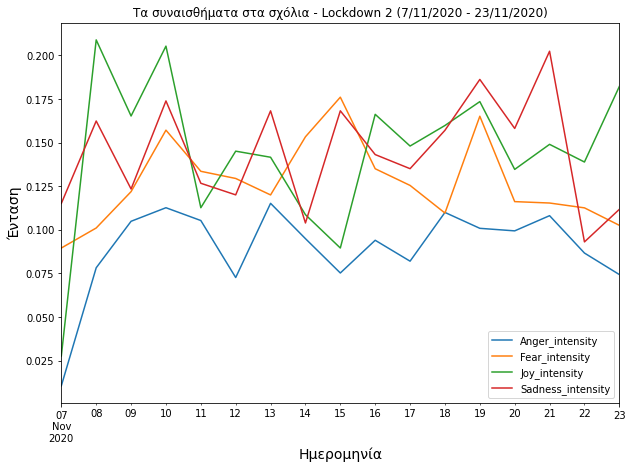

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-11-07')&(df_news.index<='2020-11-23')]  

lockdown1.resample('D').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια - Lockdown 2 (7/11/2020 - 23/11/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

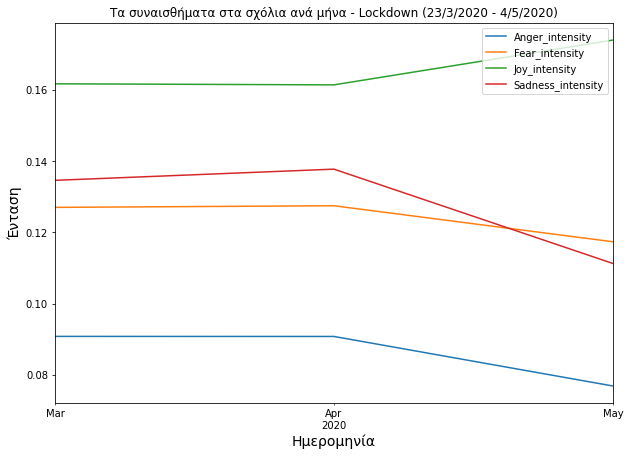

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-03-23')&(df_news.index<='2020-05-04')]  

lockdown1.resample('M').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανά μήνα - Lockdown (23/3/2020 - 4/5/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-11-07')&(df_news.index<='2020-05-04')]  

lockdown1.resample('D').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανά ημέρα - Lockdown (23/3/2020 - 4/5/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

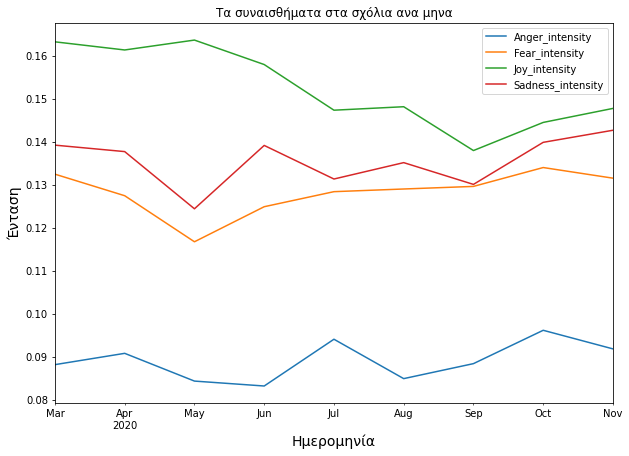

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

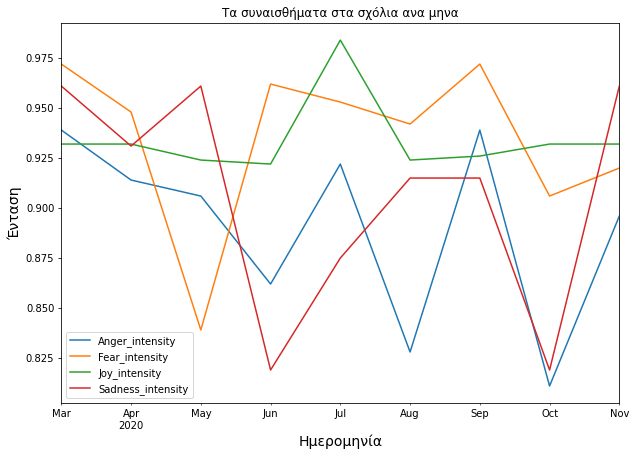

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').max().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

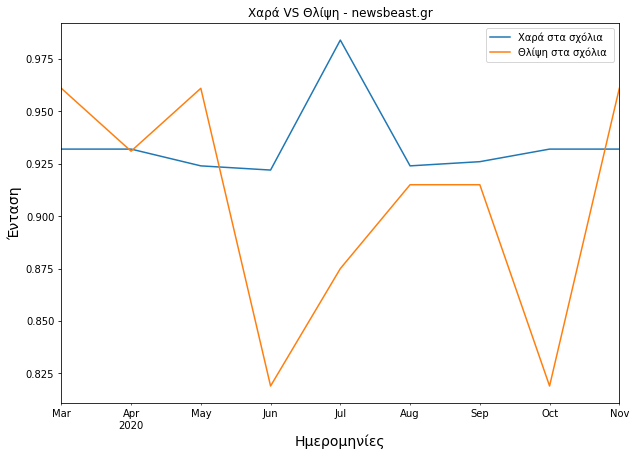

In [ ]:
df_news['Joy_intensity'].resample('M').max().plot(figsize = (10,7),label = 'Χαρά στα σχόλια ')
df_news['Sadness_intensity'].resample('M').max().plot(figsize = (10,7),label = 'Θλίψη στα σχόλια ')
plt.legend()
plt.title('Xαρά VS Θλίψη - newsbeast.gr')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

No handles with labels found to put in legend.


Text(0, 0.5, 'Scores')

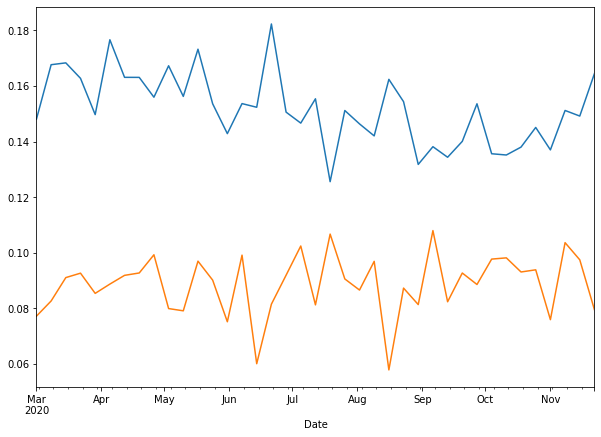

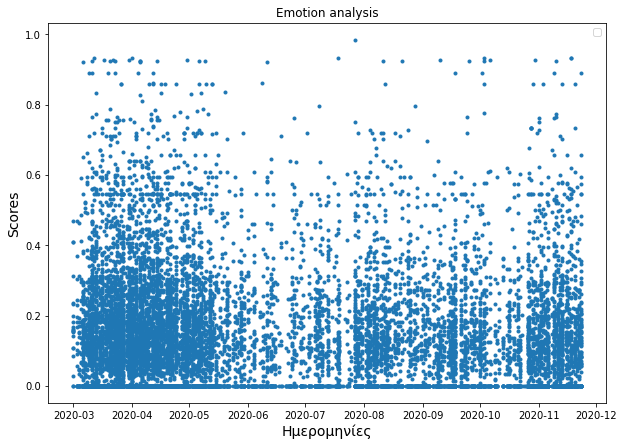

In [ ]:
#df_news.sort_index(inplace=True)
df_news.index = pd.to_datetime(df_news.index)

df_news['Joy_intensity'].resample('7D').mean().plot(figsize = (10,7))
df_news['Anger_intensity'].resample('7D').mean().plot(figsize = (10,7))

plt.figure(figsize = (10,7))
plt.plot(df_news['Joy_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(M).mean(),'r')

plt.legend()
plt.title('Emotion analysis')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#plt.hist(df_news['Joy_intensity'],'.')

In [ ]:
df_news['Sadness_intensity'].mean()


0.09272426343465018

In [ ]:
df_news['Fear_intensity'].mean()


0.11575450275684744

Text(0, 0.5, 'Ένταση')

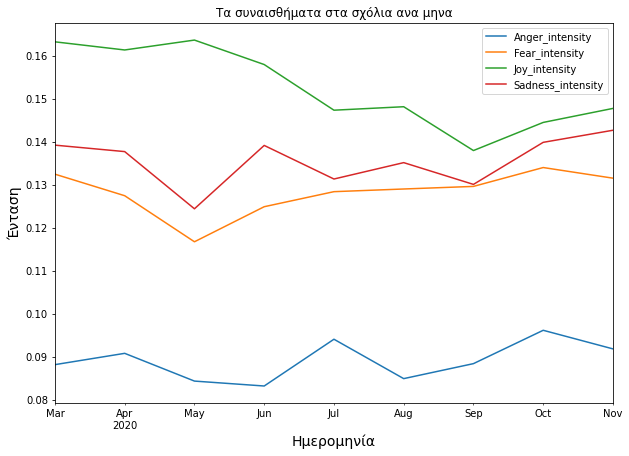

In [ ]:
df_news.resample('M').mean().plot(figsize = (10,7)) #kinoymenos mesos 7 imerwn

plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)


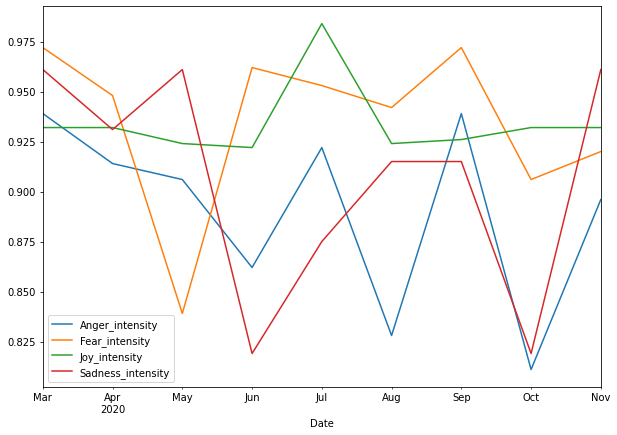

In [ ]:
df_news.resample('M').max().plot(figsize = (10,7))


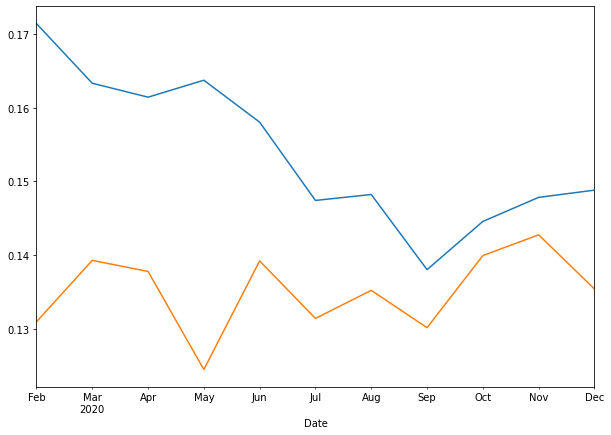

In [ ]:
df_news['Joy_intensity'].resample('M').mean().plot(figsize = (10,7))
df_news['Sadness_intensity'].resample('M').mean().plot(figsize = (10,7))

No handles with labels found to put in legend.


Text(0, 0.5, 'Scores')

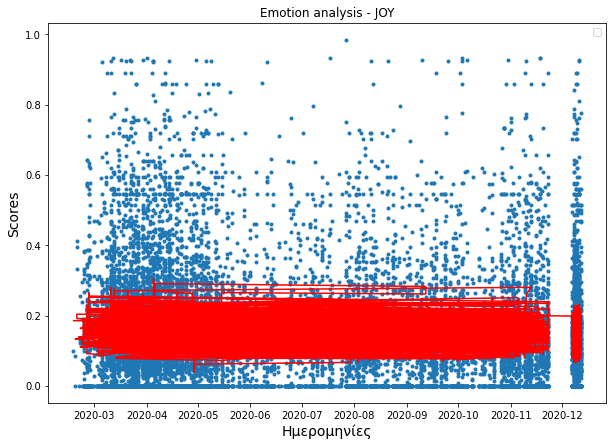

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(df_news['Joy_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(D).mean(),'r')
plt.plot(df_news['Joy_intensity'].rolling(30,center=True).mean(),'r')

plt.legend()
plt.title('Emotion analysis - JOY')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

In [ ]:
dfval = df_news.sample(500)
dfval

,title,date,body,url,comments,Date,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-05-07,Το μαγιάτικο φεγγάρι έβγαλε τους Αθηναίους από...,07/05/2020,"Έως αυτή την ώρα παραμένουν περίπου 100 άτομα,...",https://www.newsbeast.gr/greece/arthro/6263041...,Άμα υπάρχει κάλος στον εγκέφαλο καταντας όπως ...,2020-05-07,Άμα υπαρχει καλος στον εγκεφαλο καταντας οπως ...,ΑΜΑ ΥΠΑΡΧ ΚΑΛ ΣΤΟΝ ΕΓΚΕΦΑΛ ΚΑΤΑΝΤ ΟΠΩΣ ΟΙ ΜΠΕΚ...,0.000000,0.0000,0.547667,0.000000
2020-07-07,Συναγερμός μετά τα 43 νέα κρούσματα κορονοϊού ...,07/07/2020,Ανησυχία προκαλεί η αύξηση των κρουσμάτων κορο...,https://www.newsbeast.gr/greece/arthro/6447095...,Είχε σιωπήσει αρκετό καιρό . Τώρα πλέον θα έχε...,2020-07-07,Ειχε σιωπησει αρκετο καιρο . Τωρα πλεον θα εχε...,ΕΙΧ ΣΙΩΠ ΑΡΚΕΤ ΚΑΙΡ . ΤΩΡ ΠΛΕΟΝ ΘΑ ΕΧ ΤΗΝ ΤΙΜΗ...,0.000000,0.0000,0.298000,0.000000
2020-11-03,Συγκλονίζει ο δημοσιογράφος του ΣΚΑΪ: Ο κορονο...,03/11/2020,"Με μία ανάρτηση που συγκινεί, ο δημοσιογράφος ...",https://www.newsbeast.gr/media/arthro/6786465/...,"Η γιαγια του ,η θειά του.,ο σκύλος,η γάτα του....",2020-11-03,"Η γιαγια του ,η θεια του.,ο σκυλος,η γατα του....","Η ΓΙΑΓΙ ΤΟΥ , Η ΘΕΙ ΤΟΥ.,Ο ΣΚΥΛ , Η ΓΑΤ ΤΟΥ.\'...",0.401500,0.1485,0.000000,0.203000
2020-11-15,Σε επιφυλακή η Αστυνομία για την επέτειο του Π...,15/11/2020,Σε εγρήγορση βρίσκεται η Αστυνομία για την απο...,https://www.newsbeast.gr/greece/arthro/6827011...,Κανονική χούντα. Μόνο που τώρα αντί για τανκς ...,2020-11-15,Κανονικη χουντα. Μονο που τωρα αντι για τανκς ...,ΚΑΝΟΝ ΧΟΥΝΤ . ΜΟΝ ΠΟΥ ΤΩΡ ΑΝΤΙ ΓΙΑ ΤΑΝΚΣ ΕΧ ΤΑ...,0.187500,0.2735,0.000000,0.300000
2020-02-26,Κορονοϊός: Τα συμπτώματα και οι τρόποι αντιμετ...,26/02/2020,Παγκόσμια ανησυχία έχει προκαλέσει η εξάπλωση ...,https://www.newsbeast.gr/health/arthro/6054538...,νέμεσις....σεισμοί και λοιμοί μέχρι ο Αρτέμης ...,2020-02-26,νεμεσις....σεισμοι και λοιμοι μεχρι ο Αρτεμης ...,ΝΕΜΕΣΙΣ .... ΣΕΙΣΜ ΚΑΙ ΛΟΙΜ ΜΕΧΡΙ Ο ΑΡΤΕΜ ΣΩΡΡ...,0.369500,0.7185,0.000000,0.367000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,Η συγκλονιστική ιστορία του 74χρονου που πάλευ...,29/09/2020,Ήταν ένας από τους πρώτους 10 ασθενείς που δια...,https://www.newsbeast.gr/greece/arthro/6673435...,Γιατι οι γιατροί ζητιάνοι είναι να κάνουν έραν...,2020-09-29,Γιατι οι γιατροι ζητιανοι ειναι να κανουν εραν...,ΓΙΑΤΙ ΟΙ ΓΙΑΤΡ ΖΗΤΙΑΝ ΕΙΝΑΙ ΝΑ ΚΑΝ ΕΡΑΝ ? ΚΡΑΤ...,0.000000,0.0000,0.000000,0.140667
2020-04-21,Αντιδήμαρχος Ερμιονίδας: Σενάριο καραντίνας στ...,21/04/2020,Σε εξέλιξη είναι η σύσκεψη στο δημαρχείο Ερμιο...,https://www.newsbeast.gr/greece/arthro/6216984...,Οι Σομαλοι είναι από εμπόλεμη ζώνη και ήρθαν ω...,2020-04-21,Οι Σομαλοι ειναι απο εμπολεμη ζωνη και ηρθαν ω...,ΟΙ ΣΟΜΑΛ ΕΙΝΑΙ ΑΠΟ ΕΜΠΟΛΕΜ ΖΩΝ ΚΑΙ ΗΡΘ ΩΣ ΠΡΟΣ...,0.301250,0.2150,0.000000,0.113250
2020-10-20,«Χτύπημα» από τον standard & poors στην οικονο...,20/10/2020,Ο οίκος αξιολόγησης S&P Global Ratings διατήρη...,https://www.newsbeast.gr/financial/arthro/6743...,"Εμείς το ξέρουμε από ημέρες, την οικονομική τη...",2020-10-20,"Εμεις το ξερουμε απο ημερες, την οικονομικη τη...","ΕΜΕΙΣ ΤΟ ΞΕΡ ΑΠΟ ΗΜΕΡ , ΤΗΝ ΟΙΚΟΝΟΜ ΤΗΣ ΚΑΤΑΣΤ...",0.000000,0.1290,0.023500,0.206000


In [ ]:
dfval.to_csv("/gdrive/My Drive/Colab Notebooks/FINALval500commentsNEWSBEAST.csv", encoding="utf-8", index=False)

In [ ]:
dfval

,title,comments,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,
2020-05-07,Το μαγιάτικο φεγγάρι έβγαλε τους Αθηναίους από...,Άμα υπάρχει κάλος στον εγκέφαλο καταντας όπως ...,0.000000,0.0000,0.547667,0.000000
2020-07-07,Συναγερμός μετά τα 43 νέα κρούσματα κορονοϊού ...,Είχε σιωπήσει αρκετό καιρό . Τώρα πλέον θα έχε...,0.000000,0.0000,0.298000,0.000000
2020-11-03,Συγκλονίζει ο δημοσιογράφος του ΣΚΑΪ: Ο κορονο...,"Η γιαγια του ,η θειά του.,ο σκύλος,η γάτα του....",0.401500,0.1485,0.000000,0.203000
2020-11-15,Σε επιφυλακή η Αστυνομία για την επέτειο του Π...,Κανονική χούντα. Μόνο που τώρα αντί για τανκς ...,0.187500,0.2735,0.000000,0.300000
2020-02-26,Κορονοϊός: Τα συμπτώματα και οι τρόποι αντιμετ...,νέμεσις....σεισμοί και λοιμοί μέχρι ο Αρτέμης ...,0.369500,0.7185,0.000000,0.367000
...,...,...,...,...,...,...
2020-09-29,Η συγκλονιστική ιστορία του 74χρονου που πάλευ...,Γιατι οι γιατροί ζητιάνοι είναι να κάνουν έραν...,0.000000,0.0000,0.000000,0.140667
2020-04-21,Αντιδήμαρχος Ερμιονίδας: Σενάριο καραντίνας στ...,Οι Σομαλοι είναι από εμπόλεμη ζώνη και ήρθαν ω...,0.301250,0.2150,0.000000,0.113250
2020-10-20,«Χτύπημα» από τον standard & poors στην οικονο...,"Εμείς το ξέρουμε από ημέρες, την οικονομική τη...",0.000000,0.1290,0.023500,0.206000


In [ ]:
dfval.drop(['date', 'body', 'Sxolia_clean','Sxolia','Date', 'url'], axis='columns', inplace=True)
 

In [ ]:
#BODY SENT FINAL

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

In [ ]:
df_news =  pd.read_csv("/gdrive/My Drive/Colab Notebooks/newsbeastsentBODY_cleaned.csv")

In [ ]:
df_news

,title,date,body,url,comments,Date,body2,body_clean
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ..."
1,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...
2,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...
3,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...
4,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...
...,...,...,...,...,...,...,...,...
2295,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...
2296,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...
2297,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...
2298,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Στα εισαγομενα μετρανε και τους προσφογολαθρομ...,2020-09-15,Σημερα 15/9 ανακοινωθηκαν 310 νεα κρουσματα με...,ΣΗΜΕΡ 15/9 ΑΝΑΚΟΙΝΩΘ 310 ΝΕ ΚΡΟΥΣΜ ΜΕ ΤΙΣ ΑΡΧ ...


In [ ]:
AIL_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/AIL_df.csv")

In [ ]:
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
9439,ΨΕΥΔ,0.164,trust
9440,ΦΥΓ,0.141,trust
9441,ΔΙΑΖΥΓ,0.133,trust
9442,ΔΟΛΩΜ,0.133,trust


In [ ]:
AIL_df.drop_duplicates(subset=['term','AffectDimension'], keep='first', inplace = True)
AIL_df.reset_index(drop=True, inplace = True)

In [ ]:
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
7713,ΨΕΥΔ,0.164,trust
7714,ΦΥΓ,0.141,trust
7715,ΔΙΑΖΥΓ,0.133,trust
7716,ΔΟΛΩΜ,0.133,trust


In [ ]:
#anger
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_anger_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[0]

get_anger_score('ΕΞΟΡΓΙΣΜΕΝ')

0.964

In [ ]:
df_news ['Anger_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_anger_score(x))

In [ ]:
#fear

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_fear_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[3]


get_fear_score('ΦΟΒ')

0.8590000000000001

In [ ]:
df_news ['Fear_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_fear_score(x))


In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_joy_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[4]

get_joy_score('ΧΑΡ')

0.924

In [ ]:
df_news ['Joy_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_joy_score(x))


In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_sadness_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[5]

get_sadness_score('ΠΕΝΘ')

0.969

In [ ]:
df_news ['Sadness_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_sadness_score(x))


In [ ]:
cols = [ 'Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity']
df_news[cols] = df_news[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
df_news[cols].dropna(inplace=False)

,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,0.025595,0.103286,0.082310,0.117429
1,0.097848,0.146413,0.092630,0.101239
2,0.074902,0.142890,0.107634,0.125000
3,0.088015,0.162288,0.130894,0.130091
4,0.028309,0.125364,0.043255,0.075636
...,...,...,...,...
2295,0.097128,0.080681,0.042319,0.035638
2296,0.047833,0.158708,0.105917,0.101458
2297,0.087114,0.131179,0.061846,0.107463
2298,0.055385,0.092292,0.104302,0.164865


In [ ]:
df_news

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
1,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
3,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
4,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319
2296,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...,0.047833,0.101458,0.158708,0.105917
2297,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...,0.087114,0.107463,0.131179,0.061846
2298,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Στα εισαγομενα μετρανε και τους προσφογολαθρομ...,2020-09-15,Σημερα 15/9 ανακοινωθηκαν 310 νεα κρουσματα με...,ΣΗΜΕΡ 15/9 ΑΝΑΚΟΙΝΩΘ 310 ΝΕ ΚΡΟΥΣΜ ΜΕ ΤΙΣ ΑΡΧ ...,0.055385,0.164865,0.092292,0.104302


In [ ]:
index_col = df_news[(df_news['Anger_intensity'] >= 0) & (df_news['Fear_intensity'] <= 0) & (df_news['Joy_intensity'] <= 0)& (df_news['Sadness_intensity'] <= 0)].index 
df_news.drop(index_col, inplace = True) 
df_news

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
1,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
3,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
4,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319
2296,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...,0.047833,0.101458,0.158708,0.105917
2297,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...,0.087114,0.107463,0.131179,0.061846
2298,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Στα εισαγομενα μετρανε και τους προσφογολαθρομ...,2020-09-15,Σημερα 15/9 ανακοινωθηκαν 310 νεα κρουσματα με...,ΣΗΜΕΡ 15/9 ΑΝΑΚΟΙΝΩΘ 310 ΝΕ ΚΡΟΥΣΜ ΜΕ ΤΙΣ ΑΡΧ ...,0.055385,0.164865,0.092292,0.104302


In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALnewsbeastsentiment_bodyall.csv", encoding="utf-8", index=False)

In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINALnewsbeastsentiment_bodyall.csv", encoding="utf-8")
df_news

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
1,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
3,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
4,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319
2295,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...,0.047833,0.101458,0.158708,0.105917
2296,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...,0.087114,0.107463,0.131179,0.061846
2297,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Στα εισαγομενα μετρανε και τους προσφογολαθρομ...,2020-09-15,Σημερα 15/9 ανακοινωθηκαν 310 νεα κρουσματα με...,ΣΗΜΕΡ 15/9 ΑΝΑΚΟΙΝΩΘ 310 ΝΕ ΚΡΟΥΣΜ ΜΕ ΤΙΣ ΑΡΧ ...,0.055385,0.164865,0.092292,0.104302


In [ ]:
#df_news.set_index(df_news['Date'],inplace=True)

df_news['Date'] = pd.to_datetime(df_news.Date,dayfirst = False)
df_news


,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
1,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
3,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
4,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319
2295,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...,0.047833,0.101458,0.158708,0.105917
2296,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...,0.087114,0.107463,0.131179,0.061846
2297,Αρνητικό ρεκόρ στην Αττική με 197 κρούσματα – ...,15/09/2020,Σήμερα 15/9 ανακοινώθηκαν 310 νέα κρούσματα με...,https://www.newsbeast.gr/greece/arthro/6628257...,Στα εισαγομενα μετρανε και τους προσφογολαθρομ...,2020-09-15,Σημερα 15/9 ανακοινωθηκαν 310 νεα κρουσματα με...,ΣΗΜΕΡ 15/9 ΑΝΑΚΟΙΝΩΘ 310 ΝΕ ΚΡΟΥΣΜ ΜΕ ΤΙΣ ΑΡΧ ...,0.055385,0.164865,0.092292,0.104302


In [ ]:
df_news.set_index(df_news['Date'],inplace=True)
df_news

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-10-12,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
2020-08-12,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2020-08-12,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
2020-10-12,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
2020-09-12,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319
2020-06-21,Κορονοϊός στην Ελλάδα: 10 νέα κρούσματα σήμερα...,21/06/2020,Ο ΕΟΔΥ ανακοίνωσε την Κυριακή 10 νέα κρούσματα...,https://www.newsbeast.gr/greece/arthro/6399200...,Για πες μας τη δικη σου επιστημονικη εξηγηση$$...,2020-06-21,Ο ΕΟΔΥ ανακοινωσε την Κυριακη 10 νεα κρουσματα...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΤΗΝ ΚΥΡΙΑΚ 10 ΝΕ ΚΡΟΥΣΜ ΚΟΡΟΝΟ...,0.047833,0.101458,0.158708,0.105917
2020-01-06,Σωτήρης Τσιόδρας: Το lockdown είχε 80% επιτυχί...,01/06/2020,«Υπάρχουν πολλά ζητήματα που δεν έχουν ακόμη δ...,https://www.newsbeast.gr/greece/arthro/6341446...,16 εκατομμύρια εμβόλια είχε παραγγείλει από ετ...,2020-01-06,«Υπαρχουν πολλα ζητηματα που δεν εχουν ακομη δ...,« ΥΠΑΡΧ ΠΟΛΛ ΖΗΤΗΜ ΠΟΥ ΔΕΝ ΕΧ ΑΚΟΜ ΔΙΕΡΕΥΝ » Ε...,0.087114,0.107463,0.131179,0.061846


In [ ]:
leipei = df_news[(df_news.index>='2020-04-04')&(df_news.index<='2020-05-04')]  
leipei

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-04-30,Κορονοϊός: Μέσα σε ένα μήνα έμειναν άνεργοι 30...,30/04/2020,"Κατά 13,2% αυξήθηκε τον Απρίλιο ο αριθμός των ...",https://www.newsbeast.gr/financial/arthro/6245...,Ένα Γερμανό στη φωτογραφία από τη Γερμανία !$$...,2020-04-30,"Κατα 13,2% αυξηθηκε τον Απριλιο ο αριθμος των ...","ΚΑΤΑ 13,2% ΑΥΞ ΤΟΝ ΑΠΡΙΛ Ο ΑΡΙΘΜ ΤΩΝ ΑΝΕΡΓ ΣΤ ...",0.045710,0.130290,0.106194,0.139742
2020-05-03,Διοικητής Νοσοκομείου Ηλείας για κορονοϊό: Χρε...,05/03/2020,Συναγερμός έχει σημάνει σε ολόκληρο τον νομό Η...,https://www.newsbeast.gr/health/arthro/6077773...,αληθεύει ότι πήγε και την προηγούμενη ημέρα κα...,2020-05-03,Συναγερμος εχει σημανει σε ολοκληρο τον νομο Η...,"ΣΥΝΑΓΕΡΜ ΕΧ ΣΗΜΑΝ ΣΕ ΟΛΟΚΛΗΡ ΤΟΝ ΝΟΜ ΗΛΕΙ , ΣΤ...",0.017896,0.171687,0.023284,0.132269
2020-04-16,"Κορονοϊός: Ανατριχίλα στο Νιου Τζέρσι, δεκαεπτ...",16/04/2020,Τουλάχιστον 17 πτώματα εντόπισαν οι αρχές σε α...,https://www.newsbeast.gr/world/arthro/6206391/...,Στις ΗΠΑ αν δεν έχεις να πληρώσεις ιδιωτική ασ...,2020-04-16,Τουλαχιστον 17 πτωματα εντοπισαν οι αρχες σε α...,ΤΟΥΛΑΧΙΣΤΟΝ 17 ΠΤΩΜ ΕΝΤΟΠΙΣ ΟΙ ΑΡΧ ΣΕ ΑΥΤΟΣΧΕΔ...,0.087608,0.238270,0.096108,0.189365
2020-04-15,Επίδομα 800 ευρώ: Από σήμερα η καταβολή του – ...,15/04/2020,Από σήμερα Μεγάλη Τετάρτη 15 Απριλίου αναμένετ...,https://www.newsbeast.gr/financial/arthro/6202...,Δεν ξέρετε τι σας γίνεται..Ρίξαμε το taxis οεο...,2020-04-15,Απο σημερα Μεγαλη Τεταρτη 15 Απριλιου αναμενετ...,ΑΠΟ ΣΗΜΕΡ ΜΕΓΑΛ ΤΕΤΑΡΤ 15 ΑΠΡΙΛ ΑΝΑΜΕΝ ΝΑ ΞΕΚΙ...,0.018386,0.050802,0.093802,0.038069
2020-04-23,Έρευνα στη Γαλλία: Το 26% ανέπτυξε αντισώματα ...,23/04/2020,Επιδημιολογική έρευνα που έγινε σε λύκειο στο ...,https://www.newsbeast.gr/health/arthro/6223515...,"25% σημαίνει ότι 16,7 εκατομμύρια Γάλλων είναι...",2020-04-23,Επιδημιολογικη ερευνα που εγινε σε λυκειο στο ...,ΕΠΙΔΗΜΙΟΛΟΓ ΕΡΕΥΝ ΠΟΥ ΕΓΙΝ ΣΕ ΛΥΚΕΙ ΣΤ ΚΡΕΠΙ-Α...,0.062878,0.091267,0.087844,0.100533
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,Φόβοι για δεύτερο και χειρότερο κύμα κορονοϊού...,23/04/2020,Η πρόωρη χαλάρωση των περιορισμών λόγω του κορ...,https://www.newsbeast.gr/world/arthro/6225968/...,Αυτά τα διαβάζει κανείς....? τα δίνει σημασίαΔ...,2020-04-23,Η προωρη χαλαρωση των περιορισμων λογω του κορ...,Η ΠΡΟΩΡ ΧΑΛΑΡΩΣ ΤΩΝ ΠΕΡΙΟΡΙΣΜ ΛΟΓ ΤΟΥ ΚΟΡΟΝΟΙ ...,0.101389,0.208648,0.177815,0.157667
2020-04-24,Βανάκι «Μένουμε σπίτι» εμψυχώνει τους Αθηναίου...,24/04/2020,Με βανάκι που κυκλοφορεί στους δρόμους της Αθή...,https://www.newsbeast.gr/greece/arthro/6228666...,2 μέσα στο αυτοκίνητο χωρίς μάσκες....κ μας λέ...,2020-04-24,Με βανακι που κυκλοφορει στους δρομους της Αθη...,ΜΕ ΒΑΝΑΚ ΠΟΥ ΚΥΚΛΟΦΟΡ ΣΤ ΔΡΟΜ ΤΗΣ ΑΘΗΝ ΣΤΕΛΝ Π...,0.039000,0.068917,0.255917,0.001417
2020-04-14,Κορονοϊός: Φοιτητές της Ιατρικής Σχολής του ΕΚ...,14/04/2020,Φοιτητές της Ιατρικής Σχολής ΕΚΠΑ ανταποκρίθηκ...,https://www.newsbeast.gr/greece/arthro/6200137...,Μπράβο στα παιδιά! Αξιέπαινη κίνηση! Αλλά θα μ...,2020-04-14,Φοιτητες της Ιατρικης Σχολης ΕΚΠΑ ανταποκριθηκ...,ΦΟΙΤΗΤ ΤΗΣ ΙΑΤΡ ΣΧΟΛ ΕΚΠ ΑΝΤΑΠΟΚΡΙΘ ΣΤ ΚΑΛΕΣΜ ...,0.014447,0.109631,0.107932,0.087777


In [ ]:
df_news = df_news[(df_news.index>='2020-03-01')&(df_news.index<='2020-11-23')]
df_news

,title,date,body,url,comments,Date,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
Date,,,,,,,,,,,,
2020-10-12,Νέα έρευνα για τον κορονοϊό: Τα παιδιά μολύνον...,10/12/2020,Τα παιδιά μολύνονται το ίδιο συχνά με τους ενή...,https://www.newsbeast.gr/health/coronavirus/ar...,Το ήξεραν !!! Γι\'αυτο ΔΕΝ έκαναν τεστ στα σχο...,2020-10-12,Τα παιδια μολυνονται το ιδιο συχνα με τους ενη...,"ΤΑ ΠΑΙΔ ΜΟΛΥΝ ΤΟ ΙΔΙ ΣΥΧΝ ΜΕ ΤΟΥΣ ΕΝΗΛ , ΕΙΝΑΙ...",0.025595,0.117429,0.103286,0.082310
2020-08-12,Μέσα στα Χριστούγεννα η μεγάλη καμπάνια για το...,08/12/2020,Μια σειρά από διαφημιστικά σποτ ετοιμάζονται α...,https://www.newsbeast.gr/politiki/arthro/68941...,τωρα βγαλανε αποφαση για σταση εργασιας θα εκα...,2020-08-12,Μια σειρα απο διαφημιστικα σποτ ετοιμαζονται α...,ΜΙΑ ΣΕΙΡ ΑΠΟ ΔΙΑΦΗΜΙΣΤ ΣΠΟΤ ΕΤΟΙΜΑΖ ΑΥΤ ΤΗΝ ΩΡ...,0.097848,0.101239,0.146413,0.092630
2020-08-12,Βατόπουλος: Ίσως το καλοκαίρι να μπορέσουμε να...,08/12/2020,Για τους δύσκολους μήνες που μας περιμένουν κα...,https://www.newsbeast.gr/greece/arthro/6895240...,Βατόπουλε μιλας παρα πολυ και πολυ αοριστα!! Κ...,2020-08-12,Για τους δυσκολους μηνες που μας περιμενουν κα...,ΓΙΑ ΤΟΥΣ ΔΥΣΚΟΛ ΜΗΝ ΠΟΥ ΜΑΣ ΠΕΡΙΜΕΝ ΚΑΙ ΓΙΑ ΤΗ...,0.074902,0.125000,0.142890,0.107634
2020-10-12,Χριστούγεννα με ανοικτά κομμωτήρια: Τι λένε οι...,10/12/2020,Με δεδομένο ότι η επιτροπή λοιμωξιολόγων εισηγ...,https://www.newsbeast.gr/greece/arthro/6903689...,πρωτο θεμα στο σταρ τα κομμωτηρια τα μαγαζια μ...,2020-10-12,Με δεδομενο οτι η επιτροπη λοιμωξιολογων εισηγ...,ΜΕ ΔΕΔΟΜΕΝ ΟΤΙ Η ΕΠΙΤΡΟΠ ΛΟΙΜΩΞΙΟΛΟΓ ΕΙΣΗΓ ΤΟ ...,0.088015,0.130091,0.162288,0.130894
2020-09-12,Δωρεάν rapid tests σε Δενδροπόταμο και Αλεξανδ...,09/12/2020,Δωρεάν μαζικές δειγματοληψίες (rapid tests) γι...,https://www.newsbeast.gr/greece/arthro/6895535...,έχουν ΑΜΚΑ;,2020-09-12,Δωρεαν μαζικες δειγματοληψιες (rapid tests) γι...,ΔΩΡΕ ΜΑΖ ΔΕΙΓΜΑΤΟΛΗΨ ( RAPID TESTS ) ΓΙΑ ΤΟΝ Κ...,0.028309,0.075636,0.125364,0.043255
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,ΗΠΑ: Το Πεντάγωνο απαγορεύει τις μετακινήσεις ...,25/03/2020,Ο υπουργός Aμυνας των ΗΠΑ Μαρκ Έσπερ εξέδωσε ε...,https://www.newsbeast.gr/world/arthro/6139552/...,"Aναγνωστες και αναγνώστριες του αρθρου , στη p...",2020-03-25,Ο υπουργος Aμυνας των ΗΠΑ Μαρκ Έσπερ εξεδωσε ε...,Ο ΥΠΟΥΡΓ AΜΥΝΑΣ ΤΩΝ ΗΠΑ ΜΑΡΚ ΕΣΠΕΡ ΕΞΕΔΩΣ ΕΝΤΟ...,0.109800,0.145750,0.127900,0.028400
2020-09-11,Νέα έρευνα: Πόσο επικίνδυνο είναι να κολλήσεις...,09/11/2020,Σε μια σειρά από παράγοντες κινδύνου μόλυνσης ...,https://www.newsbeast.gr/health/coronavirus/ar...,Πόσοι θεωρούν ακόμα το lockdown απαραίτητο μέτ...,2020-09-11,Σε μια σειρα απο παραγοντες κινδυνου μολυνσης ...,ΣΕ ΜΙΑ ΣΕΙΡ ΑΠΟ ΠΑΡΑΓΟΝΤ ΚΙΝΔΥΝ ΜΟΛΥΝΣ ΚΑΤΑ ΤΗ...,0.052160,0.207580,0.135037,0.115457
2020-07-31,Κορονοϊός: Συμφωνία της Ε.Ε. για να δοθούν 300...,31/07/2020,Την εξασφάλιση εξ ονόματος των 27 χωρών - μελώ...,https://www.newsbeast.gr/health/arthro/6515740...,Τον Βασιλάκη τον θύρα τον ρωτήσατε?,2020-07-31,Την εξασφαλιση εξ ονοματος των 27 χωρων - μελω...,ΤΗΝ ΕΞΑΣΦΑΛΙΣ ΕΞ ΟΝΟΜ ΤΩΝ 27 ΧΩΡ - ΜΕΛ ΤΗΣ Ε.Ε...,0.097128,0.035638,0.080681,0.042319


Text(0, 0.5, 'Ένταση')

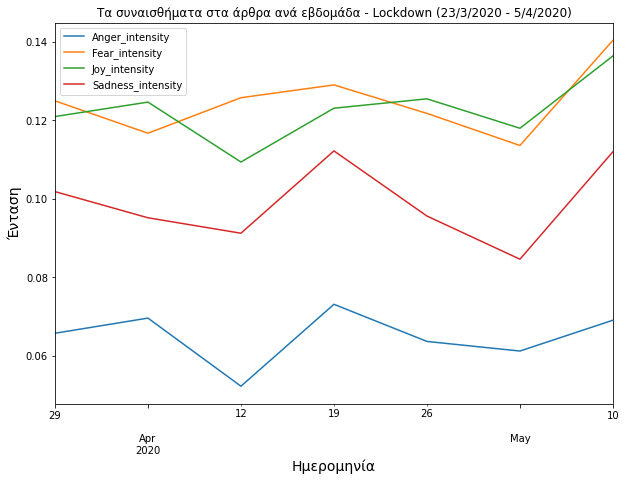

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-03-23')&(df_news.index<='2020-05-04')]  

lockdown1.resample('W').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα άρθρα ανά εβδομάδα - Lockdown (23/3/2020 - 5/4/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

In [ ]:
#leipei = df_news[(df_news.index>='2020-03-31')&(df_news.index<='2020-04-03')]  


Text(0, 0.5, 'Scores')

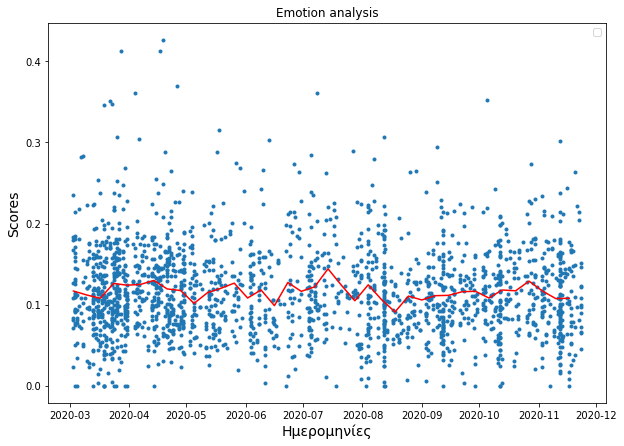

In [ ]:
df_news.index = pd.to_datetime(df_news.index)


plt.figure(figsize = (10,7))
plt.plot(df_news['Fear_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(M).mean(),'r')
plt.plot(df_news['Fear_intensity'].resample('7D').mean(),'r')

plt.legend()
plt.title('Emotion analysis')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#plt.hist(df_news['Joy_intensity'],'.')

Text(0, 0.5, 'Ένταση')

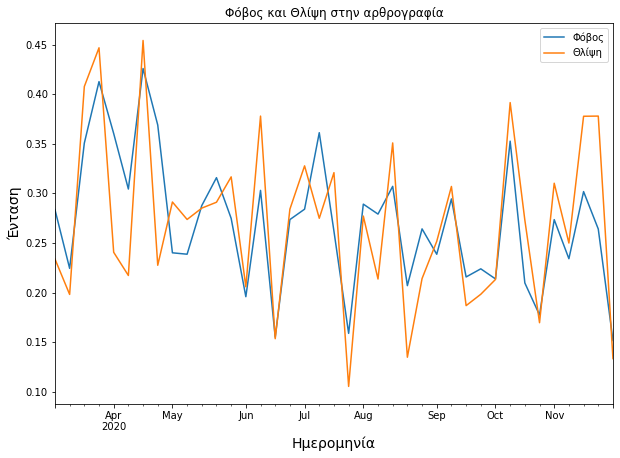

In [ ]:
df_news['Fear_intensity'].resample('W').max().plot(figsize = (10,7), label = 'Φόβος')
df_news['Sadness_intensity'].resample('W').max().plot(figsize = (10,7), label = 'Θλίψη')

plt.legend()
plt.title('Φόβος και Θλίψη στην αρθρογραφία')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

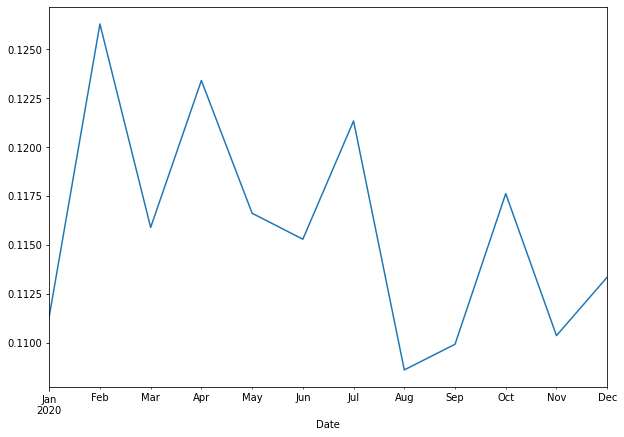

In [ ]:
df_news['Fear_intensity'].resample('M').mean().plot(figsize = (10,7))


Text(0, 0.5, 'Bαθμολογίες')

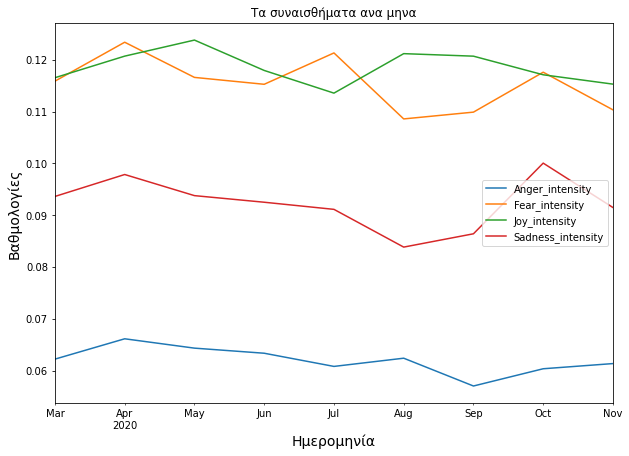

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Bαθμολογίες', fontsize=14)

Text(0, 0.5, 'Bαθμολογίες')

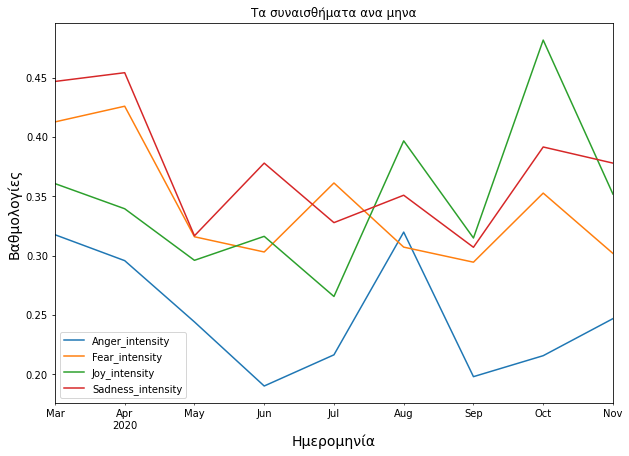

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').max().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Bαθμολογίες', fontsize=14)

(array([ 15.,  21.,  65., 154., 257., 313., 375., 270., 252., 184., 112.,
         73.,  62.,  55.,  26.,  28.,  11.,   4.,   6.,   7.,   3.,   2.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.     , 0.01606, 0.03212, 0.04818, 0.06424, 0.0803 , 0.09636,
        0.11242, 0.12848, 0.14454, 0.1606 , 0.17666, 0.19272, 0.20878,
        0.22484, 0.2409 , 0.25696, 0.27302, 0.28908, 0.30514, 0.3212 ,
        0.33726, 0.35332, 0.36938, 0.38544, 0.4015 , 0.41756, 0.43362,
        0.44968, 0.46574, 0.4818 ]),
 <a list of 30 Patch objects>)

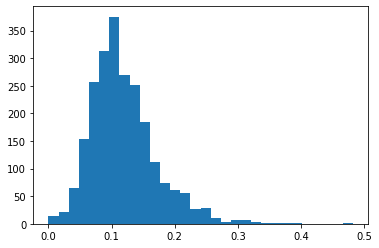

In [ ]:
plt.hist(df_news['Joy_intensity'],bins=30)


(array([ 64., 111., 197., 235., 278., 242., 252., 185., 125., 113.,  67.,
         41.,  39.,  23.,  20.,  13.,   8.,   2.,  10.,   3.,   3.,   4.,
          0.,   1.,   3.,   2.,   1.,   0.,   0.,   3.]),
 array([0.        , 0.01514253, 0.03028506, 0.04542759, 0.06057011,
        0.07571264, 0.09085517, 0.1059977 , 0.12114023, 0.13628276,
        0.15142529, 0.16656782, 0.18171034, 0.19685287, 0.2119954 ,
        0.22713793, 0.24228046, 0.25742299, 0.27256552, 0.28770805,
        0.30285057, 0.3179931 , 0.33313563, 0.34827816, 0.36342069,
        0.37856322, 0.39370575, 0.40884828, 0.4239908 , 0.43913333,
        0.45427586]),
 <a list of 30 Patch objects>)

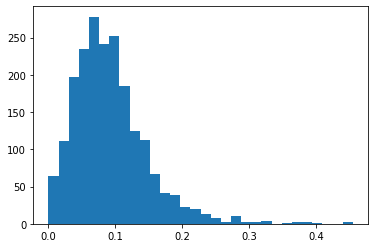

In [ ]:
plt.hist(df_news['Sadness_intensity'],bins=30)


(array([ 40.,  38.,  75., 135., 204., 252., 268., 274., 230., 215., 172.,
        128.,  78.,  50.,  49.,  32.,  15.,  12.,   7.,   7.,   5.,   1.,
          0.,   5.,   2.,   1.,   0.,   2.,   1.,   1.]),
 array([0.        , 0.01474444, 0.02948889, 0.04423333, 0.05897778,
        0.07372222, 0.08846667, 0.10321111, 0.11795556, 0.1327    ,
        0.14744444, 0.16218889, 0.17693333, 0.19167778, 0.20642222,
        0.22116667, 0.23591111, 0.25065556, 0.2654    , 0.28014444,
        0.29488889, 0.30963333, 0.32437778, 0.33912222, 0.35386667,
        0.36861111, 0.38335556, 0.3981    , 0.41284444, 0.42758889,
        0.44233333]),
 <a list of 30 Patch objects>)

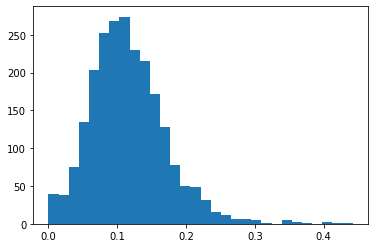

In [ ]:
plt.hist(df_news['Fear_intensity'],bins=30)
